In [480]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.linear_model import LinearRegression

In [481]:
con=pd.read_csv('consumption.csv')

In [482]:
#con.head()

<h2>Preprocessing</h2>


In [483]:
con = con.drop('meter_id',axis=1)


In [484]:
#checking % of null values in each column
missing_con = con.isnull().mean().round(2)*100
print(missing_con)

2017-01-01 00:00:00    92.0
2017-01-01 00:30:00    92.0
2017-01-01 01:00:00    92.0
2017-01-01 01:30:00    92.0
2017-01-01 02:00:00    92.0
                       ... 
2017-12-31 21:30:00     1.0
2017-12-31 22:00:00     1.0
2017-12-31 22:30:00     1.0
2017-12-31 23:00:00     1.0
2017-12-31 23:30:00     1.0
Length: 17520, dtype: float64


In [485]:
dropped_con = con.loc[:, con.isnull().mean() < .95]


In [486]:
#interpolating the remaining columns after dropping cols>95% null values
new_con = dropped_con.interpolate()

In [487]:
con1=new_con.transpose()


In [488]:
#con1.head()

In [489]:
#con1.dtypes

In [490]:
#converting row headings to datetime datatype
con1.index=pd.to_datetime(con1.index)

In [491]:
#con1.describe()

In [492]:
con1


0      1      2      3      4      5      6      7     \
2017-01-01 00:00:00    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2017-01-01 00:30:00    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2017-01-01 01:00:00    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2017-01-01 01:30:00    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2017-01-01 02:00:00    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...                    ...    ...    ...    ...    ...    ...    ...    ...   
2017-12-31 21:30:00  0.074  0.394  0.027  0.057  0.014  0.426  0.014  0.234   
2017-12-31 22:00:00  0.092  0.073  0.001  0.018  0.028  0.032  0.006  0.207   
2017-12-31 22:30:00  0.076  0.077  0.044  0.038  0.006  0.014  0.031  0.170   
2017-12-31 23:00:00  0.055  0.049  0.004  0.040  0.024  0.032  0.005  0.187   
2017-12-31 23:30:00  0.036  0.048  0.035  0.014  0.025  0.011  0.027  0.152   

                      8      9     ...   3238   3239   3240   3241   3242  \
2017-01-01 00:00:00    NaN    NaN  ...  0.219  0.015  0.320  0.012  0.155   
2017-01-01 00:30:00    NaN    NaN  ...  2.707  2.879  0.325  1.476  0.153   
2017-01-01 01:00:00    NaN    NaN  ...  2.752  2.895  0.194  0.237  0.161   
2017-01-01 01:30:00    NaN    NaN  ...  2.369  2.038  0.284  0.274  0.206   
2017-01-01 02:00:00    NaN    NaN  ...  1.583  1.635  0.278  0.015  0.168   
...                    ...    ...  ...    ...    ...    ...    ...    ...   
2017-12-31 21:30:00  0.165  0.152  ...  0.379  0.158  0.519  1.947  0.209   
2017-12-31 22:00:00  0.111  0.106  ...  0.479  0.160  0.441  1.717  0.210   
2017-12-31 22:30:00  0.126  0.085  ...  0.654  0.288  0.385  0.332  0.209   
2017-12-31 23:00:00  0.087  0.067  ...  0.850  0.156  0.319  0.304  0.195   
2017-12-31 23:30:00  0.116  0.071  ...  0.383  0.143  0.305  0.309  0.153   

                      3243   3244   3245   3246   3247  
2017-01-01 00:00:00  0.011  0.015  0.222  0.195  0.023  
2017-01-01 00:30:00  1.089  1.523  0.276  2.881  2.307  
2017-01-01 01:00:00  0.014  0.105  0.097  1.765  1.403  
2017-01-01 01:30:00  0.204  0.296  0.058  1.391  1.471  
2017-01-01 02:00:00  0.015  0.067  0.045  1.609  1.421  
...                    ...    ...    ...    ...    ...  
2017-12-31 21:30:00  0.201  0.009  0.127  0.185  0.200  
2017-12-31 22:00:00  0.181  0.008  0.135  0.171  0.203  
2017-12-31 22:30:00  0.181  0.033  0.200  0.196  0.203  
2017-12-31 23:00:00  0.177  0.015  0.118  0.260  0.190  
2017-12-31 23:30:00  0.198  0.013  0.106  0.318  0.186  

[16320 rows x 3248 columns]

In [495]:
#Smoothening the data by excluding outliers
min_threshold, max_threshold=con1['2017-01'].mean(axis=1).quantile([0,1])
min_threshold, max_threshold

(0.12672407407407413, 0.44490555555555567)

In [496]:
#monthly mean filled for each column
con1['2017-01'] = con1['2017-01'][(con1['2017-01']<max_threshold)&(con1['2017-01']>min_threshold)]
con1['2017-01']=con1['2017-01'].fillna(con1['2017-01'].mean())
con1['2017-01']=con1['2017-01'].fillna((con1['2017-01'].mean()).mean())
con1['2017-01']

0         1         2         3         4     \
2017-01-01 00:00:00  0.232989  0.232989  0.232989  0.232989  0.232989   
2017-01-01 00:30:00  0.232989  0.232989  0.232989  0.232989  0.232989   
2017-01-01 01:00:00  0.232989  0.232989  0.232989  0.232989  0.232989   
2017-01-01 01:30:00  0.232989  0.232989  0.232989  0.232989  0.232989   
2017-01-01 02:00:00  0.232989  0.232989  0.232989  0.232989  0.232989   
...                       ...       ...       ...       ...       ...   
2017-01-31 21:30:00  0.232989  0.232989  0.232989  0.232989  0.232989   
2017-01-31 22:00:00  0.232989  0.232989  0.232989  0.232989  0.232989   
2017-01-31 22:30:00  0.232989  0.232989  0.232989  0.232989  0.232989   
2017-01-31 23:00:00  0.232989  0.232989  0.232989  0.232989  0.232989   
2017-01-31 23:30:00  0.232989  0.232989  0.232989  0.232989  0.232989   

                         5         6         7         8         9     ...  \
2017-01-01 00:00:00  0.232989  0.232989  0.232989  0.232989  0.232989  ...   
2017-01-01 00:30:00  0.232989  0.232989  0.232989  0.232989  0.232989  ...   
2017-01-01 01:00:00  0.232989  0.232989  0.232989  0.232989  0.232989  ...   
2017-01-01 01:30:00  0.232989  0.232989  0.232989  0.232989  0.232989  ...   
2017-01-01 02:00:00  0.232989  0.232989  0.232989  0.232989  0.232989  ...   
...                       ...       ...       ...       ...       ...  ...   
2017-01-31 21:30:00  0.232989  0.232989  0.232989  0.232989  0.232989  ...   
2017-01-31 22:00:00  0.232989  0.232989  0.232989  0.232989  0.232989  ...   
2017-01-31 22:30:00  0.232989  0.232989  0.232989  0.232989  0.232989  ...   
2017-01-31 23:00:00  0.232989  0.232989  0.232989  0.232989  0.232989  ...   
2017-01-31 23:30:00  0.232989  0.232989  0.232989  0.232989  0.232989  ...   

                        3238      3239      3240      3241   3242      3243  \
2017-01-01 00:00:00  0.21900  0.211457  0.320000  0.227527  0.155  0.180545   
2017-01-01 00:30:00  0.27296  0.211457  0.325000  0.227527  0.153  0.180545   
2017-01-01 01:00:00  0.27296  0.211457  0.194000  0.237000  0.161  0.180545   
2017-01-01 01:30:00  0.27296  0.211457  0.284000  0.274000  0.206  0.204000   
2017-01-01 02:00:00  0.27296  0.211457  0.278000  0.227527  0.168  0.180545   
...                      ...       ...       ...       ...    ...       ...   
2017-01-31 21:30:00  0.27296  0.211457  0.313616  0.227527  0.248  0.180545   
2017-01-31 22:00:00  0.27296  0.137000  0.313616  0.227527  0.241  0.180545   
2017-01-31 22:30:00  0.27296  0.211457  0.313616  0.227527  0.226  0.180545   
2017-01-31 23:00:00  0.36100  0.211457  0.313616  0.227527  0.219  0.180545   
2017-01-31 23:30:00  0.20500  0.211457  0.313616  0.227527  0.189  0.180545   

                         3244      3245      3246      3247  
2017-01-01 00:00:00  0.235799  0.222000  0.195000  0.194464  
2017-01-01 00:30:00  0.235799  0.276000  0.204902  0.194464  
2017-01-01 01:00:00  0.235799  0.208066  0.204902  0.194464  
2017-01-01 01:30:00  0.296000  0.208066  0.204902  0.194464  
2017-01-01 02:00:00  0.235799  0.208066  0.204902  0.194464  
...                       ...       ...       ...       ...  
2017-01-31 21:30:00  0.235799  0.172000  0.315000  0.194464  
2017-01-31 22:00:00  0.235799  0.158000  0.308000  0.194464  
2017-01-31 22:30:00  0.235799  0.208066  0.223000  0.194464  
2017-01-31 23:00:00  0.235799  0.192000  0.198000  0.194464  
2017-01-31 23:30:00  0.235799  0.304000  0.174000  0.194464  

[1440 rows x 3248 columns]

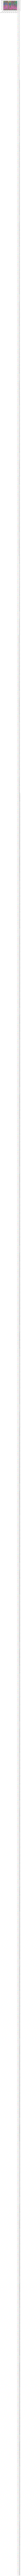

In [150]:
con1['2017-01'].plot()

In [497]:
min_threshold, max_threshold=con1['2017-02'].mean(axis=1).quantile([0,1])
con1['2017-02'] = con1['2017-02'][(con1['2017-02']<max_threshold)&(con1['2017-02']>min_threshold)]
con1['2017-02']=con1['2017-02'].fillna(con1['2017-02'].mean())
con1['2017-02']=con1['2017-02'].fillna((con1['2017-02'].mean()).mean())
con1['2017-02']

0         1         2         3         4     \
2017-02-01 00:00:00  0.224719  0.224719  0.224719  0.224719  0.224719   
2017-02-01 00:30:00  0.224719  0.224719  0.224719  0.224719  0.224719   
2017-02-01 01:00:00  0.224719  0.224719  0.224719  0.224719  0.224719   
2017-02-01 01:30:00  0.224719  0.224719  0.224719  0.224719  0.224719   
2017-02-01 02:00:00  0.224719  0.224719  0.224719  0.224719  0.224719   
...                       ...       ...       ...       ...       ...   
2017-02-28 21:30:00  0.224719  0.224719  0.224719  0.224719  0.224719   
2017-02-28 22:00:00  0.224719  0.224719  0.224719  0.224719  0.224719   
2017-02-28 22:30:00  0.224719  0.224719  0.224719  0.224719  0.224719   
2017-02-28 23:00:00  0.224719  0.224719  0.224719  0.224719  0.224719   
2017-02-28 23:30:00  0.224719  0.224719  0.224719  0.224719  0.224719   

                         5         6         7         8         9     ...  \
2017-02-01 00:00:00  0.224719  0.224719  0.224719  0.224719  0.224719  ...   
2017-02-01 00:30:00  0.224719  0.224719  0.224719  0.224719  0.224719  ...   
2017-02-01 01:00:00  0.224719  0.224719  0.224719  0.224719  0.224719  ...   
2017-02-01 01:30:00  0.224719  0.224719  0.224719  0.224719  0.224719  ...   
2017-02-01 02:00:00  0.224719  0.224719  0.224719  0.224719  0.224719  ...   
...                       ...       ...       ...       ...       ...  ...   
2017-02-28 21:30:00  0.224719  0.224719  0.224719  0.224719  0.224719  ...   
2017-02-28 22:00:00  0.224719  0.224719  0.224719  0.224719  0.224719  ...   
2017-02-28 22:30:00  0.224719  0.224719  0.224719  0.224719  0.224719  ...   
2017-02-28 23:00:00  0.224719  0.224719  0.224719  0.224719  0.224719  ...   
2017-02-28 23:30:00  0.224719  0.224719  0.224719  0.224719  0.224719  ...   

                         3238      3239      3240      3241      3242  \
2017-02-01 00:00:00  0.219000  0.209438  0.291782  0.232217  0.156000   
2017-02-01 00:30:00  0.207647  0.209438  0.329000  0.232217  0.167000   
2017-02-01 01:00:00  0.207647  0.209438  0.326000  0.205000  0.153000   
2017-02-01 01:30:00  0.207647  0.209438  0.334000  0.281000  0.149000   
2017-02-01 02:00:00  0.207647  0.357000  0.334000  0.232217  0.150000   
...                       ...       ...       ...       ...       ...   
2017-02-28 21:30:00  0.199000  0.209438  0.291782  0.435000  0.215969   
2017-02-28 22:00:00  0.221000  0.137000  0.291782  0.399000  0.320000   
2017-02-28 22:30:00  0.143000  0.209438  0.336000  0.232217  0.215969   
2017-02-28 23:00:00  0.207647  0.209438  0.336000  0.418000  0.379000   
2017-02-28 23:30:00  0.207647  0.209438  0.331000  0.126000  0.236000   

                         3243      3244     3245      3246      3247  
2017-02-01 00:00:00  0.173709  0.225833  0.15300  0.190000  0.287832  
2017-02-01 00:30:00  0.173709  0.225833  0.19927  0.207535  0.287832  
2017-02-01 01:00:00  0.255000  0.225833  0.19927  0.207535  0.287832  
2017-02-01 01:30:00  0.173709  0.257000  0.19927  0.207535  0.287832  
2017-02-01 02:00:00  0.166000  0.161000  0.19927  0.207535  0.287832  
...                       ...       ...      ...       ...       ...  
2017-02-28 21:30:00  0.173709  0.225833  0.12900  0.218000  0.198000  
2017-02-28 22:00:00  0.173709  0.225833  0.12100  0.196000  0.197000  
2017-02-28 22:30:00  0.173709  0.225833  0.19927  0.207535  0.216000  
2017-02-28 23:00:00  0.173709  0.225833  0.19927  0.207535  0.228000  
2017-02-28 23:30:00  0.173709  0.225833  0.19927  0.207535  0.232000  

[1344 rows x 3248 columns]

In [498]:
min_threshold, max_threshold=con1['2017-03'].mean(axis=1).quantile([0,1])
con1['2017-03'] = con1['2017-03'][(con1['2017-03']<max_threshold)&(con1['2017-03']>min_threshold)]
con1['2017-03']=con1['2017-03'].fillna(con1['2017-03'].mean())
con1['2017-03']=con1['2017-03'].fillna((con1['2017-03'].mean()).mean())
con1['2017-03']

0         1         2         3         4     \
2017-03-01 00:00:00  0.198406  0.198406  0.198406  0.198406  0.198406   
2017-03-01 00:30:00  0.198406  0.198406  0.198406  0.198406  0.198406   
2017-03-01 01:00:00  0.198406  0.198406  0.198406  0.198406  0.198406   
2017-03-01 01:30:00  0.198406  0.198406  0.198406  0.198406  0.198406   
2017-03-01 02:00:00  0.198406  0.198406  0.198406  0.198406  0.198406   
...                       ...       ...       ...       ...       ...   
2017-03-31 21:30:00  0.198406  0.198406  0.198406  0.198406  0.198406   
2017-03-31 22:00:00  0.198406  0.198406  0.198406  0.198406  0.198406   
2017-03-31 22:30:00  0.198406  0.198406  0.198406  0.198406  0.198406   
2017-03-31 23:00:00  0.198406  0.198406  0.198406  0.198406  0.198406   
2017-03-31 23:30:00  0.198406  0.198406  0.198406  0.198406  0.198406   

                         5         6         7         8         9     ...  \
2017-03-01 00:00:00  0.198406  0.198406  0.198406  0.198406  0.198406  ...   
2017-03-01 00:30:00  0.198406  0.198406  0.198406  0.198406  0.198406  ...   
2017-03-01 01:00:00  0.198406  0.198406  0.198406  0.198406  0.198406  ...   
2017-03-01 01:30:00  0.198406  0.198406  0.198406  0.198406  0.198406  ...   
2017-03-01 02:00:00  0.198406  0.198406  0.198406  0.198406  0.198406  ...   
...                       ...       ...       ...       ...       ...  ...   
2017-03-31 21:30:00  0.198406  0.198406  0.198406  0.198406  0.198406  ...   
2017-03-31 22:00:00  0.198406  0.198406  0.198406  0.198406  0.198406  ...   
2017-03-31 22:30:00  0.198406  0.198406  0.198406  0.198406  0.198406  ...   
2017-03-31 23:00:00  0.198406  0.198406  0.198406  0.198406  0.198406  ...   
2017-03-31 23:30:00  0.198406  0.198406  0.198406  0.198406  0.198406  ...   

                         3238      3239   3240      3241      3242    3243  \
2017-03-01 00:00:00  0.175781  0.183586  0.307  0.230452  0.233000  0.1627   
2017-03-01 00:30:00  0.175781  0.183586  0.282  0.230452  0.170000  0.1627   
2017-03-01 01:00:00  0.175781  0.183586  0.288  0.230452  0.170000  0.1850   
2017-03-01 01:30:00  0.175781  0.183586  0.269  0.230452  0.178000  0.1627   
2017-03-01 02:00:00  0.175781  0.183586  0.299  0.230452  0.171000  0.1550   
...                       ...       ...    ...       ...       ...     ...   
2017-03-31 21:30:00  0.177000  0.183586  0.276  0.230452  0.216711  0.1627   
2017-03-31 22:00:00  0.175781  0.183586  0.296  0.171000  0.310000  0.1627   
2017-03-31 22:30:00  0.175781  0.183586  0.385  0.291000  0.246000  0.1627   
2017-03-31 23:00:00  0.175781  0.183586  0.233  0.167000  0.361000  0.1627   
2017-03-31 23:30:00  0.175781  0.183586  0.190  0.230452  0.311000  0.1627   

                         3244      3245      3246      3247  
2017-03-01 00:00:00  0.205312  0.169000  0.177238  0.260000  
2017-03-01 00:30:00  0.205312  0.149000  0.177238  0.200601  
2017-03-01 01:00:00  0.205312  0.180968  0.177238  0.200601  
2017-03-01 01:30:00  0.324000  0.180968  0.177238  0.359000  
2017-03-01 02:00:00  0.118000  0.180968  0.177238  0.382000  
...                       ...       ...       ...       ...  
2017-03-31 21:30:00  0.205312  0.167000  0.121000  0.200601  
2017-03-31 22:00:00  0.205312  0.167000  0.177238  0.200601  
2017-03-31 22:30:00  0.205312  0.124000  0.177238  0.200601  
2017-03-31 23:00:00  0.205312  0.107000  0.177238  0.200601  
2017-03-31 23:30:00  0.205312  0.180968  0.177238  0.200601  

[1488 rows x 3248 columns]

In [499]:
min_threshold, max_threshold=con1['2017-04'].mean(axis=1).quantile([0,1])
con1['2017-04'] = con1['2017-04'][(con1['2017-04']<max_threshold)&(con1['2017-04']>min_threshold)]
con1['2017-04']=con1['2017-04'].fillna(con1['2017-04'].mean())
con1['2017-04']=con1['2017-04'].fillna((con1['2017-04'].mean()).mean())
con1['2017-04']

0         1         2         3         4     \
2017-04-01 00:00:00  0.166155  0.166155  0.166155  0.166155  0.166155   
2017-04-01 00:30:00  0.166155  0.166155  0.166155  0.166155  0.166155   
2017-04-01 01:00:00  0.166155  0.166155  0.166155  0.166155  0.166155   
2017-04-01 01:30:00  0.166155  0.166155  0.166155  0.166155  0.166155   
2017-04-01 02:00:00  0.166155  0.166155  0.166155  0.166155  0.166155   
...                       ...       ...       ...       ...       ...   
2017-04-30 21:30:00  0.166155  0.166155  0.166155  0.166155  0.166155   
2017-04-30 22:00:00  0.166155  0.166155  0.166155  0.166155  0.166155   
2017-04-30 22:30:00  0.166155  0.166155  0.166155  0.166155  0.166155   
2017-04-30 23:00:00  0.166155  0.166155  0.166155  0.166155  0.166155   
2017-04-30 23:30:00  0.166155  0.166155  0.166155  0.166155  0.166155   

                         5         6         7         8         9     ...  \
2017-04-01 00:00:00  0.166155  0.166155  0.166155  0.166155  0.166155  ...   
2017-04-01 00:30:00  0.166155  0.166155  0.166155  0.166155  0.166155  ...   
2017-04-01 01:00:00  0.166155  0.166155  0.166155  0.166155  0.166155  ...   
2017-04-01 01:30:00  0.166155  0.166155  0.166155  0.166155  0.166155  ...   
2017-04-01 02:00:00  0.166155  0.166155  0.166155  0.166155  0.166155  ...   
...                       ...       ...       ...       ...       ...  ...   
2017-04-30 21:30:00  0.166155  0.166155  0.166155  0.166155  0.166155  ...   
2017-04-30 22:00:00  0.166155  0.166155  0.166155  0.166155  0.166155  ...   
2017-04-30 22:30:00  0.166155  0.166155  0.166155  0.166155  0.166155  ...   
2017-04-30 23:00:00  0.166155  0.166155  0.166155  0.166155  0.166155  ...   
2017-04-30 23:30:00  0.166155  0.166155  0.166155  0.166155  0.166155  ...   

                         3238      3239      3240      3241      3242  \
2017-04-01 00:00:00  0.107000  0.160523  0.234000  0.193667  0.250000   
2017-04-01 00:30:00  0.147994  0.160523  0.251000  0.193667  0.243000   
2017-04-01 01:00:00  0.147994  0.160523  0.185000  0.193667  0.241000   
2017-04-01 01:30:00  0.147994  0.263000  0.156000  0.193667  0.178000   
2017-04-01 02:00:00  0.147994  0.214000  0.162000  0.193667  0.162000   
...                       ...       ...       ...       ...       ...   
2017-04-30 21:30:00  0.130000  0.160523  0.203177  0.193667  0.186408   
2017-04-30 22:00:00  0.147994  0.160523  0.203177  0.155000  0.186408   
2017-04-30 22:30:00  0.147994  0.160523  0.203177  0.193667  0.186408   
2017-04-30 23:00:00  0.147994  0.160523  0.176000  0.193667  0.186408   
2017-04-30 23:30:00  0.147994  0.160523  0.159000  0.193667  0.186408   

                         3243      3244      3245      3246      3247  
2017-04-01 00:00:00  0.165384  0.198208  0.156893  0.157037  0.160751  
2017-04-01 00:30:00  0.165384  0.198208  0.156893  0.157037  0.160751  
2017-04-01 01:00:00  0.177000  0.178000  0.156893  0.157037  0.160751  
2017-04-01 01:30:00  0.165384  0.198000  0.156893  0.157037  0.160751  
2017-04-01 02:00:00  0.172000  0.219000  0.156893  0.157037  0.164000  
...                       ...       ...       ...       ...       ...  
2017-04-30 21:30:00  0.165384  0.198208  0.156893  0.117000  0.121000  
2017-04-30 22:00:00  0.165384  0.198208  0.156893  0.126000  0.160751  
2017-04-30 22:30:00  0.165384  0.198208  0.156893  0.157037  0.160751  
2017-04-30 23:00:00  0.165384  0.198208  0.156893  0.157037  0.160751  
2017-04-30 23:30:00  0.165384  0.198208  0.156893  0.157037  0.160751  

[1440 rows x 3248 columns]

In [500]:
min_threshold, max_threshold=con1['2017-05'].mean(axis=1).quantile([0,1])
con1['2017-05'] = con1['2017-05'][(con1['2017-05']<max_threshold)&(con1['2017-05']>min_threshold)]
con1['2017-05']=con1['2017-05'].fillna(con1['2017-05'].mean())
con1['2017-05']=con1['2017-05'].fillna((con1['2017-05'].mean()).mean())
con1['2017-05']

0         1         2         3         4     \
2017-05-01 00:00:00  0.153285  0.153285  0.153285  0.153285  0.153285   
2017-05-01 00:30:00  0.153285  0.153285  0.153285  0.153285  0.153285   
2017-05-01 01:00:00  0.153285  0.153285  0.153285  0.153285  0.153285   
2017-05-01 01:30:00  0.153285  0.153285  0.153285  0.153285  0.153285   
2017-05-01 02:00:00  0.153285  0.153285  0.153285  0.153285  0.153285   
...                       ...       ...       ...       ...       ...   
2017-05-31 21:30:00  0.153285  0.153285  0.153285  0.153285  0.153285   
2017-05-31 22:00:00  0.153285  0.153285  0.153285  0.153285  0.153285   
2017-05-31 22:30:00  0.153285  0.153285  0.153285  0.153285  0.153285   
2017-05-31 23:00:00  0.153285  0.153285  0.153285  0.153285  0.153285   
2017-05-31 23:30:00  0.153285  0.153285  0.153285  0.153285  0.153285   

                         5         6         7         8         9     ...  \
2017-05-01 00:00:00  0.153285  0.153285  0.153285  0.153285  0.153285  ...   
2017-05-01 00:30:00  0.153285  0.153285  0.153285  0.153285  0.153285  ...   
2017-05-01 01:00:00  0.153285  0.153285  0.153285  0.153285  0.153285  ...   
2017-05-01 01:30:00  0.153285  0.153285  0.153285  0.153285  0.153285  ...   
2017-05-01 02:00:00  0.153285  0.153285  0.153285  0.153285  0.153285  ...   
...                       ...       ...       ...       ...       ...  ...   
2017-05-31 21:30:00  0.153285  0.153285  0.153285  0.153285  0.153285  ...   
2017-05-31 22:00:00  0.153285  0.153285  0.153285  0.153285  0.153285  ...   
2017-05-31 22:30:00  0.153285  0.153285  0.153285  0.153285  0.153285  ...   
2017-05-31 23:00:00  0.153285  0.153285  0.153285  0.153285  0.153285  ...   
2017-05-31 23:30:00  0.153285  0.153285  0.153285  0.153285  0.153285  ...   

                         3238      3239      3240      3241      3242  \
2017-05-01 00:00:00  0.147962  0.159358  0.151000  0.175185  0.166000   
2017-05-01 00:30:00  0.147962  0.159358  0.166000  0.175185  0.164000   
2017-05-01 01:00:00  0.147962  0.159358  0.170000  0.175185  0.165000   
2017-05-01 01:30:00  0.147962  0.228000  0.158000  0.175185  0.165000   
2017-05-01 02:00:00  0.174000  0.168000  0.143000  0.175185  0.164000   
...                       ...       ...       ...       ...       ...   
2017-05-31 21:30:00  0.168000  0.159358  0.184374  0.246000  0.204000   
2017-05-31 22:00:00  0.147962  0.159358  0.184374  0.212000  0.180505   
2017-05-31 22:30:00  0.147962  0.106000  0.210000  0.175185  0.173000   
2017-05-31 23:00:00  0.147962  0.159358  0.242000  0.175185  0.170000   
2017-05-31 23:30:00  0.147962  0.159358  0.220000  0.175185  0.168000   

                         3243      3244      3245      3246      3247  
2017-05-01 00:00:00  0.152444  0.177535  0.138555  0.150385  0.152979  
2017-05-01 00:30:00  0.152444  0.177535  0.138555  0.150385  0.152979  
2017-05-01 01:00:00  0.178000  0.177535  0.138555  0.150385  0.152979  
2017-05-01 01:30:00  0.152444  0.215000  0.138555  0.150385  0.175000  
2017-05-01 02:00:00  0.163000  0.177535  0.096000  0.150385  0.231000  
...                       ...       ...       ...       ...       ...  
2017-05-31 21:30:00  0.152444  0.177535  0.108000  0.114000  0.111000  
2017-05-31 22:00:00  0.152444  0.177535  0.107000  0.150385  0.110000  
2017-05-31 22:30:00  0.152444  0.177535  0.129000  0.150385  0.124000  
2017-05-31 23:00:00  0.152444  0.177535  0.138555  0.150385  0.136000  
2017-05-31 23:30:00  0.152444  0.177535  0.138555  0.150385  0.123000  

[1296 rows x 3248 columns]

In [501]:
min_threshold, max_threshold=con1['2017-06'].mean(axis=1).quantile([0,1])
con1['2017-06'] = con1['2017-06'][(con1['2017-06']<max_threshold)&(con1['2017-06']>min_threshold)]
con1['2017-06']=con1['2017-06'].fillna(con1['2017-06'].mean())
con1['2017-06']=con1['2017-06'].fillna((con1['2017-06'].mean()).mean())
con1['2017-06']

0         1         2         3         4     \
2017-06-01 00:00:00  0.146195  0.146195  0.146195  0.146195  0.146195   
2017-06-01 00:30:00  0.146195  0.146195  0.146195  0.146195  0.146195   
2017-06-01 01:00:00  0.146195  0.146195  0.146195  0.146195  0.146195   
2017-06-01 01:30:00  0.146195  0.146195  0.146195  0.146195  0.146195   
2017-06-01 02:00:00  0.146195  0.146195  0.146195  0.146195  0.146195   
...                       ...       ...       ...       ...       ...   
2017-06-30 21:30:00  0.146195  0.146195  0.146195  0.146195  0.146195   
2017-06-30 22:00:00  0.146195  0.146195  0.146195  0.146195  0.146195   
2017-06-30 22:30:00  0.146195  0.146195  0.146195  0.146195  0.146195   
2017-06-30 23:00:00  0.146195  0.146195  0.146195  0.146195  0.146195   
2017-06-30 23:30:00  0.146195  0.146195  0.146195  0.146195  0.146195   

                         5         6         7         8         9     ...  \
2017-06-01 00:00:00  0.146195  0.146195  0.146195  0.146195  0.146195  ...   
2017-06-01 00:30:00  0.146195  0.146195  0.146195  0.146195  0.146195  ...   
2017-06-01 01:00:00  0.146195  0.146195  0.146195  0.146195  0.146195  ...   
2017-06-01 01:30:00  0.146195  0.146195  0.146195  0.146195  0.146195  ...   
2017-06-01 02:00:00  0.146195  0.146195  0.146195  0.146195  0.146195  ...   
...                       ...       ...       ...       ...       ...  ...   
2017-06-30 21:30:00  0.146195  0.146195  0.146195  0.146195  0.146195  ...   
2017-06-30 22:00:00  0.146195  0.146195  0.146195  0.146195  0.146195  ...   
2017-06-30 22:30:00  0.146195  0.146195  0.146195  0.146195  0.146195  ...   
2017-06-30 23:00:00  0.146195  0.146195  0.146195  0.146195  0.146195  ...   
2017-06-30 23:30:00  0.146195  0.146195  0.146195  0.146195  0.146195  ...   

                         3238      3239      3240     3241      3242  \
2017-06-01 00:00:00  0.100000  0.144582  0.212000  0.16904  0.168000   
2017-06-01 00:30:00  0.139472  0.144582  0.179188  0.16904  0.169000   
2017-06-01 01:00:00  0.139472  0.144582  0.223000  0.16904  0.170000   
2017-06-01 01:30:00  0.139472  0.241000  0.179188  0.16904  0.166000   
2017-06-01 02:00:00  0.173000  0.182000  0.251000  0.16904  0.167000   
...                       ...       ...       ...      ...       ...   
2017-06-30 21:30:00  0.124000  0.136000  0.179188  0.14600  0.165455   
2017-06-30 22:00:00  0.139472  0.144582  0.179188  0.16904  0.165455   
2017-06-30 22:30:00  0.139472  0.144582  0.179188  0.11400  0.165455   
2017-06-30 23:00:00  0.097000  0.144582  0.179188  0.16904  0.165455   
2017-06-30 23:30:00  0.139472  0.144582  0.179188  0.16904  0.165455   

                         3243      3244      3245      3246      3247  
2017-06-01 00:00:00  0.144075  0.182401  0.139706  0.126335  0.146304  
2017-06-01 00:30:00  0.144075  0.182401  0.139706  0.126335  0.146304  
2017-06-01 01:00:00  0.144075  0.182401  0.139706  0.182000  0.146304  
2017-06-01 01:30:00  0.166000  0.182401  0.139706  0.109000  0.146304  
2017-06-01 02:00:00  0.144075  0.182401  0.139706  0.126335  0.165000  
...                       ...       ...       ...       ...       ...  
2017-06-30 21:30:00  0.144075  0.182401  0.161000  0.133000  0.231000  
2017-06-30 22:00:00  0.144075  0.182401  0.112000  0.126335  0.145000  
2017-06-30 22:30:00  0.144075  0.182401  0.139706  0.126335  0.146304  
2017-06-30 23:00:00  0.144075  0.182401  0.139706  0.126335  0.146304  
2017-06-30 23:30:00  0.144075  0.182401  0.139706  0.126335  0.146304  

[1440 rows x 3248 columns]

In [502]:
min_threshold, max_threshold=con1['2017-07'].mean(axis=1).quantile([0,1])
con1['2017-07'] = con1['2017-07'][(con1['2017-07']<max_threshold)&(con1['2017-07']>min_threshold)]
con1['2017-07']=con1['2017-07'].fillna(con1['2017-07'].mean())
con1['2017-07']=con1['2017-07'].fillna((con1['2017-07'].mean()).mean())
con1['2017-07']

0         1         2         3         4     \
2017-07-01 00:00:00  0.138327  0.138327  0.138327  0.138327  0.138327   
2017-07-01 00:30:00  0.138327  0.138327  0.138327  0.138327  0.138327   
2017-07-01 01:00:00  0.138327  0.138327  0.138327  0.138327  0.138327   
2017-07-01 01:30:00  0.138327  0.138327  0.138327  0.138327  0.138327   
2017-07-01 02:00:00  0.138327  0.138327  0.138327  0.138327  0.138327   
...                       ...       ...       ...       ...       ...   
2017-07-31 21:30:00  0.138327  0.138327  0.138327  0.138327  0.138327   
2017-07-31 22:00:00  0.138327  0.138327  0.138327  0.138327  0.138327   
2017-07-31 22:30:00  0.138327  0.138327  0.138327  0.138327  0.138327   
2017-07-31 23:00:00  0.138327  0.138327  0.138327  0.138327  0.138327   
2017-07-31 23:30:00  0.138327  0.138327  0.138327  0.138327  0.138327   

                         5         6         7         8         9     ...  \
2017-07-01 00:00:00  0.138327  0.138327  0.138327  0.138327  0.138327  ...   
2017-07-01 00:30:00  0.138327  0.138327  0.138327  0.138327  0.138327  ...   
2017-07-01 01:00:00  0.138327  0.138327  0.138327  0.138327  0.138327  ...   
2017-07-01 01:30:00  0.138327  0.138327  0.138327  0.138327  0.138327  ...   
2017-07-01 02:00:00  0.138327  0.138327  0.138327  0.138327  0.138327  ...   
...                       ...       ...       ...       ...       ...  ...   
2017-07-31 21:30:00  0.138327  0.138327  0.138327  0.138327  0.138327  ...   
2017-07-31 22:00:00  0.138327  0.138327  0.138327  0.138327  0.138327  ...   
2017-07-31 22:30:00  0.138327  0.138327  0.138327  0.138327  0.138327  ...   
2017-07-31 23:00:00  0.138327  0.138327  0.138327  0.138327  0.138327  ...   
2017-07-31 23:30:00  0.138327  0.138327  0.138327  0.138327  0.138327  ...   

                         3238      3239      3240      3241      3242  \
2017-07-01 00:00:00  0.136391  0.141466  0.158518  0.161858  0.131812   
2017-07-01 00:30:00  0.136391  0.141466  0.158518  0.161858  0.131812   
2017-07-01 01:00:00  0.136391  0.141466  0.158518  0.161858  0.131812   
2017-07-01 01:30:00  0.136391  0.141466  0.158518  0.161858  0.131812   
2017-07-01 02:00:00  0.210000  0.151000  0.158518  0.161858  0.131812   
...                       ...       ...       ...       ...       ...   
2017-07-31 21:30:00  0.177000  0.121000  0.158518  0.208000  0.108000   
2017-07-31 22:00:00  0.136391  0.141466  0.158518  0.214000  0.106000   
2017-07-31 22:30:00  0.136391  0.141466  0.158518  0.161858  0.105000   
2017-07-31 23:00:00  0.095000  0.141466  0.158518  0.105000  0.105000   
2017-07-31 23:30:00  0.136391  0.141466  0.158518  0.161858  0.105000   

                         3243      3244      3245      3246      3247  
2017-07-01 00:00:00  0.139395  0.126383  0.131048  0.119886  0.142064  
2017-07-01 00:30:00  0.139395  0.126383  0.131048  0.119886  0.142064  
2017-07-01 01:00:00  0.139395  0.126383  0.131048  0.119886  0.142064  
2017-07-01 01:30:00  0.139395  0.126383  0.131048  0.218000  0.185000  
2017-07-01 02:00:00  0.139395  0.126383  0.131048  0.166000  0.142064  
...                       ...       ...       ...       ...       ...  
2017-07-31 21:30:00  0.139395  0.126383  0.123000  0.119000  0.142064  
2017-07-31 22:00:00  0.139395  0.126383  0.091000  0.119886  0.142064  
2017-07-31 22:30:00  0.139395  0.126383  0.089000  0.119886  0.142064  
2017-07-31 23:00:00  0.139395  0.126383  0.131048  0.119886  0.142064  
2017-07-31 23:30:00  0.139395  0.126383  0.131048  0.119886  0.142064  

[1440 rows x 3248 columns]

In [503]:
min_threshold, max_threshold=con1['2017-08'].mean(axis=1).quantile([0,1])
con1['2017-08'] = con1['2017-08'][(con1['2017-08']<max_threshold)&(con1['2017-08']>min_threshold)]
con1['2017-08']=con1['2017-08'].fillna(con1['2017-08'].mean())
con1['2017-08']=con1['2017-08'].fillna((con1['2017-08'].mean()).mean())
con1['2017-08']

0         1         2         3         4     \
2017-08-01 00:00:00  0.140794  0.140794  0.140794  0.140794  0.140794   
2017-08-01 00:30:00  0.140794  0.140794  0.140794  0.140794  0.140794   
2017-08-01 01:00:00  0.140794  0.140794  0.140794  0.140794  0.140794   
2017-08-01 01:30:00  0.140794  0.140794  0.140794  0.140794  0.140794   
2017-08-01 02:00:00  0.140794  0.140794  0.140794  0.140794  0.140794   
...                       ...       ...       ...       ...       ...   
2017-08-31 21:30:00  0.140794  0.140794  0.140794  0.140794  0.140794   
2017-08-31 22:00:00  0.140794  0.140794  0.140794  0.140794  0.140794   
2017-08-31 22:30:00  0.140794  0.140794  0.140794  0.140794  0.140794   
2017-08-31 23:00:00  0.140794  0.140794  0.140794  0.140794  0.140794   
2017-08-31 23:30:00  0.140794  0.140794  0.140794  0.140794  0.140794   

                         5         6         7         8         9     ...  \
2017-08-01 00:00:00  0.140794  0.140794  0.140794  0.140794  0.140794  ...   
2017-08-01 00:30:00  0.140794  0.140794  0.140794  0.140794  0.140794  ...   
2017-08-01 01:00:00  0.140794  0.140794  0.140794  0.140794  0.140794  ...   
2017-08-01 01:30:00  0.140794  0.140794  0.140794  0.140794  0.140794  ...   
2017-08-01 02:00:00  0.140794  0.140794  0.140794  0.140794  0.140794  ...   
...                       ...       ...       ...       ...       ...  ...   
2017-08-31 21:30:00  0.140794  0.140794  0.140794  0.140794  0.140794  ...   
2017-08-31 22:00:00  0.140794  0.140794  0.140794  0.140794  0.140794  ...   
2017-08-31 22:30:00  0.140794  0.140794  0.140794  0.140794  0.140794  ...   
2017-08-31 23:00:00  0.140794  0.140794  0.140794  0.140794  0.140794  ...   
2017-08-31 23:30:00  0.140794  0.140794  0.140794  0.140794  0.140794  ...   

                         3238      3239      3240      3241   3242      3243  \
2017-08-01 00:00:00  0.095000  0.138074  0.174398  0.165382  0.105  0.133347   
2017-08-01 00:30:00  0.138369  0.138074  0.174398  0.165382  0.106  0.133347   
2017-08-01 01:00:00  0.138369  0.138074  0.174398  0.165382  0.105  0.224000   
2017-08-01 01:30:00  0.138369  0.213000  0.174398  0.165382  0.105  0.166000   
2017-08-01 02:00:00  0.138369  0.189000  0.174398  0.165382  0.105  0.159000   
...                       ...       ...       ...       ...    ...       ...   
2017-08-31 21:30:00  0.164000  0.138074  0.174398  0.165382  0.127  0.133347   
2017-08-31 22:00:00  0.089000  0.138074  0.174398  0.106000  0.129  0.133347   
2017-08-31 22:30:00  0.138369  0.138074  0.174398  0.165382  0.124  0.133347   
2017-08-31 23:00:00  0.138369  0.138074  0.174398  0.165382  0.118  0.133347   
2017-08-31 23:30:00  0.094000  0.138074  0.174398  0.165382  0.115  0.133347   

                         3244      3245      3246      3247  
2017-08-01 00:00:00  0.137502  0.130982  0.128248  0.141943  
2017-08-01 00:30:00  0.137502  0.130982  0.128248  0.141943  
2017-08-01 01:00:00  0.210000  0.130982  0.128248  0.141943  
2017-08-01 01:30:00  0.202000  0.130982  0.128248  0.141943  
2017-08-01 02:00:00  0.150000  0.130982  0.128248  0.147000  
...                       ...       ...       ...       ...  
2017-08-31 21:30:00  0.137502  0.130982  0.139000  0.141943  
2017-08-31 22:00:00  0.137502  0.130982  0.128248  0.141943  
2017-08-31 22:30:00  0.137502  0.130982  0.128248  0.141943  
2017-08-31 23:00:00  0.137502  0.130982  0.128248  0.141943  
2017-08-31 23:30:00  0.137502  0.130982  0.128248  0.141943  

[1440 rows x 3248 columns]

In [504]:
min_threshold, max_threshold=con1['2017-09'].mean(axis=1).quantile([0,1])
con1['2017-09'] = con1['2017-09'][(con1['2017-09']<max_threshold)&(con1['2017-09']>min_threshold)]
con1['2017-09']=con1['2017-09'].fillna(con1['2017-09'].mean())
con1['2017-09']=con1['2017-09'].fillna((con1['2017-09'].mean()).mean())
con1['2017-09']

0         1         2         3         4     \
2017-09-01 00:00:00  0.153345  0.153345  0.153345  0.153345  0.153345   
2017-09-01 00:30:00  0.153345  0.153345  0.153345  0.153345  0.153345   
2017-09-01 01:00:00  0.153345  0.153345  0.153345  0.153345  0.153345   
2017-09-01 01:30:00  0.153345  0.153345  0.153345  0.153345  0.153345   
2017-09-01 02:00:00  0.153345  0.153345  0.153345  0.153345  0.153345   
...                       ...       ...       ...       ...       ...   
2017-09-30 21:30:00  0.153345  0.153345  0.153345  0.153345  0.153345   
2017-09-30 22:00:00  0.153345  0.153345  0.153345  0.153345  0.153345   
2017-09-30 22:30:00  0.153345  0.153345  0.153345  0.153345  0.153345   
2017-09-30 23:00:00  0.153345  0.153345  0.153345  0.153345  0.153345   
2017-09-30 23:30:00  0.153345  0.153345  0.153345  0.153345  0.153345   

                         5         6         7         8         9     ...  \
2017-09-01 00:00:00  0.153345  0.153345  0.153345  0.153345  0.153345  ...   
2017-09-01 00:30:00  0.153345  0.153345  0.153345  0.153345  0.153345  ...   
2017-09-01 01:00:00  0.153345  0.153345  0.153345  0.153345  0.153345  ...   
2017-09-01 01:30:00  0.153345  0.153345  0.153345  0.153345  0.153345  ...   
2017-09-01 02:00:00  0.153345  0.153345  0.153345  0.153345  0.153345  ...   
...                       ...       ...       ...       ...       ...  ...   
2017-09-30 21:30:00  0.153345  0.153345  0.153345  0.153345  0.153345  ...   
2017-09-30 22:00:00  0.153345  0.153345  0.153345  0.153345  0.153345  ...   
2017-09-30 22:30:00  0.153345  0.153345  0.153345  0.153345  0.153345  ...   
2017-09-30 23:00:00  0.153345  0.153345  0.153345  0.153345  0.153345  ...   
2017-09-30 23:30:00  0.153345  0.153345  0.153345  0.153345  0.153345  ...   

                         3238      3239      3240      3241   3242      3243  \
2017-09-01 00:00:00  0.156407  0.155291  0.216327  0.177741  0.115  0.151229   
2017-09-01 00:30:00  0.156407  0.155291  0.216327  0.177741  0.112  0.151229   
2017-09-01 01:00:00  0.156407  0.155291  0.216327  0.177741  0.111  0.151229   
2017-09-01 01:30:00  0.156407  0.192000  0.216327  0.177741  0.112  0.197000   
2017-09-01 02:00:00  0.205000  0.204000  0.216327  0.177741  0.110  0.159000   
...                       ...       ...       ...       ...    ...       ...   
2017-09-30 21:30:00  0.102000  0.155291  0.216327  0.177741  0.124  0.151229   
2017-09-30 22:00:00  0.093000  0.155291  0.216327  0.141000  0.126  0.151229   
2017-09-30 22:30:00  0.156407  0.155291  0.216327  0.177741  0.124  0.151229   
2017-09-30 23:00:00  0.156407  0.155291  0.216327  0.177741  0.126  0.151229   
2017-09-30 23:30:00  0.099000  0.155291  0.216327  0.177741  0.125  0.151229   

                         3244      3245      3246      3247  
2017-09-01 00:00:00  0.141601  0.089000  0.137145  0.149887  
2017-09-01 00:30:00  0.141601  0.143131  0.137145  0.149887  
2017-09-01 01:00:00  0.254500  0.143131  0.227000  0.149887  
2017-09-01 01:30:00  0.123500  0.143131  0.137145  0.149887  
2017-09-01 02:00:00  0.108000  0.143131  0.137145  0.159000  
...                       ...       ...       ...       ...  
2017-09-30 21:30:00  0.141601  0.182000  0.138000  0.149887  
2017-09-30 22:00:00  0.141601  0.146000  0.137145  0.149887  
2017-09-30 22:30:00  0.141601  0.150000  0.137145  0.149887  
2017-09-30 23:00:00  0.141601  0.095000  0.137145  0.149887  
2017-09-30 23:30:00  0.141601  0.102000  0.137145  0.149887  

[1296 rows x 3248 columns]

In [505]:
min_threshold, max_threshold=con1['2017-10'].mean(axis=1).quantile([0,1])
con1['2017-10'] = con1['2017-10'][(con1['2017-10']<max_threshold)&(con1['2017-10']>min_threshold)]
con1['2017-10']=con1['2017-10'].fillna(con1['2017-10'].mean())
con1['2017-10']=con1['2017-10'].fillna((con1['2017-10'].mean()).mean())
con1['2017-10']

0         1         2         3         4     \
2017-10-01 00:00:00  0.172499  0.172499  0.172499  0.172499  0.172499   
2017-10-01 00:30:00  0.172499  0.172499  0.172499  0.172499  0.172499   
2017-10-01 01:00:00  0.172499  0.172499  0.172499  0.172499  0.172499   
2017-10-01 01:30:00  0.172499  0.172499  0.172499  0.172499  0.172499   
2017-10-01 02:00:00  0.172499  0.172499  0.172499  0.172499  0.172499   
...                       ...       ...       ...       ...       ...   
2017-10-30 21:30:00  0.172499  0.172499  0.172499  0.172499  0.172499   
2017-10-30 22:00:00  0.172499  0.172499  0.172499  0.172499  0.172499   
2017-10-30 22:30:00  0.172499  0.172499  0.172499  0.172499  0.172499   
2017-10-30 23:00:00  0.172499  0.172499  0.172499  0.172499  0.172499   
2017-10-30 23:30:00  0.172499  0.172499  0.172499  0.172499  0.172499   

                         5         6         7         8         9     ...  \
2017-10-01 00:00:00  0.172499  0.172499  0.172499  0.172499  0.172499  ...   
2017-10-01 00:30:00  0.172499  0.172499  0.172499  0.172499  0.172499  ...   
2017-10-01 01:00:00  0.172499  0.172499  0.172499  0.172499  0.172499  ...   
2017-10-01 01:30:00  0.172499  0.172499  0.172499  0.172499  0.172499  ...   
2017-10-01 02:00:00  0.172499  0.172499  0.172499  0.172499  0.172499  ...   
...                       ...       ...       ...       ...       ...  ...   
2017-10-30 21:30:00  0.172499  0.172499  0.172499  0.172499  0.172499  ...   
2017-10-30 22:00:00  0.172499  0.172499  0.172499  0.172499  0.172499  ...   
2017-10-30 22:30:00  0.172499  0.172499  0.172499  0.172499  0.172499  ...   
2017-10-30 23:00:00  0.172499  0.172499  0.172499  0.172499  0.172499  ...   
2017-10-30 23:30:00  0.172499  0.172499  0.172499  0.172499  0.172499  ...   

                         3238      3239      3240      3241   3242      3243  \
2017-10-01 00:00:00  0.207594  0.162098  0.309000  0.191139  0.122  0.181071   
2017-10-01 00:30:00  0.207594  0.162098  0.335000  0.191139  0.123  0.181071   
2017-10-01 01:00:00  0.207594  0.162098  0.324000  0.191139  0.123  0.156000   
2017-10-01 01:30:00  0.262000  0.162098  0.326000  0.191139  0.123  0.240000   
2017-10-01 02:00:00  0.305000  0.191000  0.265278  0.191139  0.122  0.181071   
...                       ...       ...       ...       ...    ...       ...   
2017-10-30 21:30:00  0.276000  0.162098  0.265278  0.193000  0.221  0.217000   
2017-10-30 22:00:00  0.250000  0.148000  0.265278  0.225000  0.190  0.162000   
2017-10-30 22:30:00  0.211000  0.162098  0.265278  0.186000  0.174  0.147000   
2017-10-30 23:00:00  0.207594  0.162098  0.265278  0.288000  0.161  0.143000   
2017-10-30 23:30:00  0.207594  0.162098  0.265278  0.179000  0.110  0.146000   

                         3244      3245      3246      3247  
2017-10-01 00:00:00  0.154406  0.161064  0.174081  0.179442  
2017-10-01 00:30:00  0.154406  0.161064  0.174081  0.179442  
2017-10-01 01:00:00  0.200000  0.161064  0.174081  0.179442  
2017-10-01 01:30:00  0.160000  0.161064  0.174081  0.215000  
2017-10-01 02:00:00  0.135000  0.161064  0.319000  0.148000  
...                       ...       ...       ...       ...  
2017-10-30 21:30:00  0.154406  0.121000  0.174081  0.328000  
2017-10-30 22:00:00  0.154406  0.094000  0.134000  0.343000  
2017-10-30 22:30:00  0.154406  0.192000  0.129000  0.244000  
2017-10-30 23:00:00  0.154406  0.161064  0.174081  0.248000  
2017-10-30 23:30:00  0.154406  0.161064  0.174081  0.221000  

[1200 rows x 3248 columns]

In [506]:
min_threshold, max_threshold=con1['2017-11'].mean(axis=1).quantile([0,1])
con1['2017-11'] = con1['2017-11'][(con1['2017-11']<max_threshold)&(con1['2017-11']>min_threshold)]
con1['2017-11']=con1['2017-11'].fillna(con1['2017-11'].mean())
con1['2017-11']=con1['2017-11'].fillna((con1['2017-11'].mean()).mean())
con1['2017-11']

0         1         2         3         4     \
2017-11-02 00:00:00  0.204587  0.204587  0.204587  0.204587  0.204587   
2017-11-02 00:30:00  0.204587  0.204587  0.204587  0.204587  0.204587   
2017-11-02 01:00:00  0.204587  0.204587  0.204587  0.204587  0.204587   
2017-11-02 01:30:00  0.204587  0.204587  0.204587  0.204587  0.204587   
2017-11-02 02:00:00  0.204587  0.204587  0.204587  0.204587  0.204587   
...                       ...       ...       ...       ...       ...   
2017-11-30 21:30:00  0.204587  0.204587  0.204587  0.204587  0.204587   
2017-11-30 22:00:00  0.204587  0.204587  0.204587  0.204587  0.204587   
2017-11-30 22:30:00  0.204587  0.204587  0.204587  0.204587  0.204587   
2017-11-30 23:00:00  0.204587  0.204587  0.204587  0.204587  0.204587   
2017-11-30 23:30:00  0.204587  0.204587  0.204587  0.204587  0.204587   

                         5         6         7         8         9     ...  \
2017-11-02 00:00:00  0.204587  0.204587  0.204587  0.204587  0.204587  ...   
2017-11-02 00:30:00  0.204587  0.204587  0.204587  0.204587  0.204587  ...   
2017-11-02 01:00:00  0.204587  0.204587  0.204587  0.204587  0.204587  ...   
2017-11-02 01:30:00  0.204587  0.204587  0.204587  0.204587  0.204587  ...   
2017-11-02 02:00:00  0.204587  0.204587  0.204587  0.204587  0.204587  ...   
...                       ...       ...       ...       ...       ...  ...   
2017-11-30 21:30:00  0.204587  0.204587  0.204587  0.204587  0.204587  ...   
2017-11-30 22:00:00  0.204587  0.204587  0.204587  0.204587  0.204587  ...   
2017-11-30 22:30:00  0.204587  0.204587  0.204587  0.204587  0.204587  ...   
2017-11-30 23:00:00  0.204587  0.204587  0.204587  0.204587  0.204587  ...   
2017-11-30 23:30:00  0.204587  0.204587  0.204587  0.204587  0.204587  ...   

                         3238      3239   3240      3241      3242      3243  \
2017-11-02 00:00:00  0.202081  0.188375  0.301  0.214414  0.154000  0.118000   
2017-11-02 00:30:00  0.202081  0.188375  0.342  0.214414  0.150000  0.214789   
2017-11-02 01:00:00  0.202081  0.188375  0.334  0.214414  0.151000  0.214789   
2017-11-02 01:30:00  0.202081  0.188375  0.398  0.214414  0.150000  0.214789   
2017-11-02 02:00:00  0.202081  0.174000  0.399  0.214414  0.152000  0.185000   
...                       ...       ...    ...       ...       ...       ...   
2017-11-30 21:30:00  0.202081  0.336000  0.340  0.305000  0.268000  0.190000   
2017-11-30 22:00:00  0.202081  0.246000  0.278  0.302000  0.199973  0.203000   
2017-11-30 22:30:00  0.202081  0.179000  0.330  0.352000  0.199973  0.198000   
2017-11-30 23:00:00  0.373000  0.189000  0.327  0.176000  0.283000  0.188000   
2017-11-30 23:30:00  0.342000  0.162000  0.320  0.140000  0.199973  0.186000   

                         3244      3245      3246      3247  
2017-11-02 00:00:00  0.182576  0.180657  0.202858  0.268000  
2017-11-02 00:30:00  0.182576  0.180657  0.202858  0.204317  
2017-11-02 01:00:00  0.214000  0.180657  0.202858  0.204317  
2017-11-02 01:30:00  0.163000  0.180657  0.202858  0.204317  
2017-11-02 02:00:00  0.181000  0.180657  0.133000  0.204317  
...                       ...       ...       ...       ...  
2017-11-30 21:30:00  0.182576  0.185000  0.202858  0.204317  
2017-11-30 22:00:00  0.182576  0.188000  0.202858  0.204317  
2017-11-30 22:30:00  0.182576  0.180657  0.202858  0.204317  
2017-11-30 23:00:00  0.182576  0.196000  0.170000  0.111000  
2017-11-30 23:30:00  0.182576  0.180657  0.172000  0.204317  

[1392 rows x 3248 columns]

In [507]:
min_threshold, max_threshold=con1['2017-12'].mean(axis=1).quantile([0,1])
con1['2017-12'] = con1['2017-12'][(con1['2017-12']<max_threshold)&(con1['2017-12']>min_threshold)]
con1['2017-12']=con1['2017-12'].fillna(con1['2017-12'].mean())
con1['2017-12']=con1['2017-12'].fillna((con1['2017-12'].mean()).mean())
con1['2017-12']

0         1         2         3         4     \
2017-12-03 00:00:00  0.210455  0.287406  0.173269  0.183264  0.269713   
2017-12-03 00:30:00  0.210455  0.287406  0.173269  0.183264  0.269713   
2017-12-03 01:00:00  0.210455  0.287406  0.173269  0.183264  0.269713   
2017-12-03 01:30:00  0.210455  0.287406  0.173269  0.183264  0.269713   
2017-12-03 02:00:00  0.210455  0.287406  0.173269  0.183264  0.269713   
...                       ...       ...       ...       ...       ...   
2017-12-31 21:30:00  0.210455  0.394000  0.173269  0.183264  0.269713   
2017-12-31 22:00:00  0.210455  0.287406  0.173269  0.183264  0.269713   
2017-12-31 22:30:00  0.210455  0.287406  0.173269  0.183264  0.269713   
2017-12-31 23:00:00  0.210455  0.287406  0.173269  0.183264  0.269713   
2017-12-31 23:30:00  0.210455  0.287406  0.173269  0.183264  0.269713   

                         5         6        7         8         9     ...  \
2017-12-03 00:00:00  0.295644  0.182607  0.23212  0.254523  0.221278  ...   
2017-12-03 00:30:00  0.295644  0.182607  0.23212  0.254523  0.221278  ...   
2017-12-03 01:00:00  0.295644  0.182607  0.23212  0.254523  0.221278  ...   
2017-12-03 01:30:00  0.295644  0.182607  0.23212  0.254523  0.221278  ...   
2017-12-03 02:00:00  0.295644  0.182607  0.23212  0.254523  0.221278  ...   
...                       ...       ...      ...       ...       ...  ...   
2017-12-31 21:30:00  0.426000  0.182607  0.23400  0.165000  0.152000  ...   
2017-12-31 22:00:00  0.295644  0.182607  0.20700  0.254523  0.221278  ...   
2017-12-31 22:30:00  0.295644  0.182607  0.17000  0.254523  0.221278  ...   
2017-12-31 23:00:00  0.295644  0.182607  0.18700  0.254523  0.221278  ...   
2017-12-31 23:30:00  0.295644  0.182607  0.15200  0.254523  0.221278  ...   

                         3238      3239     3240      3241   3242      3243  \
2017-12-03 00:00:00  0.274000  0.219972  0.30100  0.170000  0.240  0.194000   
2017-12-03 00:30:00  0.306773  0.219972  0.32600  0.254102  0.195  0.199238   
2017-12-03 01:00:00  0.306773  0.219972  0.35100  0.254102  0.178  0.345000   
2017-12-03 01:30:00  0.306773  0.219972  0.31700  0.254102  0.177  0.331000   
2017-12-03 02:00:00  0.306773  0.219972  0.32000  0.254102  0.176  0.288000   
...                       ...       ...      ...       ...    ...       ...   
2017-12-31 21:30:00  0.379000  0.158000  0.34564  0.254102  0.209  0.201000   
2017-12-31 22:00:00  0.306773  0.160000  0.34564  0.254102  0.210  0.181000   
2017-12-31 22:30:00  0.306773  0.288000  0.38500  0.332000  0.209  0.181000   
2017-12-31 23:00:00  0.306773  0.156000  0.31900  0.304000  0.195  0.177000   
2017-12-31 23:30:00  0.383000  0.143000  0.30500  0.309000  0.153  0.198000   

                        3244      3245    3246      3247  
2017-12-03 00:00:00  0.20938  0.200956  0.1730  0.395000  
2017-12-03 00:30:00  0.20938  0.200956  0.1999  0.224801  
2017-12-03 01:00:00  0.21100  0.200956  0.1999  0.224801  
2017-12-03 01:30:00  0.21100  0.200956  0.1999  0.224801  
2017-12-03 02:00:00  0.13500  0.200956  0.1999  0.224801  
...                      ...       ...     ...       ...  
2017-12-31 21:30:00  0.20938  0.200956  0.1850  0.200000  
2017-12-31 22:00:00  0.20938  0.135000  0.1710  0.203000  
2017-12-31 22:30:00  0.20938  0.200000  0.1960  0.203000  
2017-12-31 23:00:00  0.20938  0.200956  0.2600  0.190000  
2017-12-31 23:30:00  0.20938  0.200956  0.3180  0.186000  

[1104 rows x 3248 columns]

In [ ]:
#min_threshold, max_threshold=con2['2017-03'].mean(axis=1).quantile([.005,.95])
#mar= con2['2017-03'].mean(axis=1)[(con2['2017-03'].mean(axis=1)<max_threshold)&(con2['2017-03'].mean(axis=1)>min_threshold)]
#con2['2017-03']=con2['2017-03'].fillna(mar.mean())

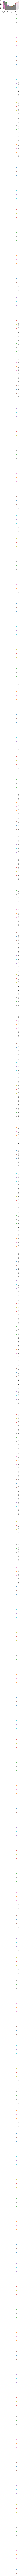

In [184]:
#smoothened out of data
con1.plot()

In [508]:
#calculate rolling mean
rollmean = con1.rolling(window=30).mean()

#Calculate standard deviation
rollstd = con1.rolling(window=30).std()

print(rollmean, rollstd)

                         0         1         2         3         4     \
2017-01-01 00:00:00       NaN       NaN       NaN       NaN       NaN   
2017-01-01 00:30:00       NaN       NaN       NaN       NaN       NaN   
2017-01-01 01:00:00       NaN       NaN       NaN       NaN       NaN   
2017-01-01 01:30:00       NaN       NaN       NaN       NaN       NaN   
2017-01-01 02:00:00       NaN       NaN       NaN       NaN       NaN   
...                       ...       ...       ...       ...       ...   
2017-12-31 21:30:00  0.220437  0.283443  0.168858  0.188471  0.263366   
2017-12-31 22:00:00  0.220437  0.282323  0.168858  0.188471  0.263366   
2017-12-31 22:30:00  0.220437  0.282323  0.168858  0.188471  0.263366   
2017-12-31 23:00:00  0.220437  0.285670  0.170267  0.188471  0.263366   
2017-12-31 23:30:00  0.220519  0.288583  0.171276  0.188471  0.263366   

                        5         6         7         8         9     ...  \
2017-01-01 00:00:00      NaN       NaN       N

In [509]:
final_df = (con1.resample('M').sum()).transpose()

In [510]:
final_con=final_df

In [511]:
final_con

2017-01-31  2017-02-28  2017-03-31  2017-04-30  2017-05-31  2017-06-30  \
0     335.503795  302.022142  295.227607  239.263382  198.657636  210.520274   
1     335.503795  302.022142  295.227607  239.263382  198.657636  210.520274   
2     335.503795  302.022142  295.227607  239.263382  198.657636  210.520274   
3     335.503795  302.022142  295.227607  239.263382  198.657636  210.520274   
4     335.503795  302.022142  295.227607  239.263382  198.657636  210.520274   
...          ...         ...         ...         ...         ...         ...   
3243  259.985455  233.465436  242.097600  238.153043  197.567242  207.468235   
3244  339.550714  303.520000  305.504563  285.420000  230.084918  262.658028   
3245  299.614958  267.819541  269.280154  225.925246  179.567537  201.176334   
3246  295.058636  278.926884  263.730879  226.133832  194.899237  181.923067   
3247  280.028571  386.846242  298.494612  231.482130  198.260499  210.677815   

      2017-07-31  2017-08-31  2017-09-30  2017-10-31  2017-11-30  2017-12-31  
0     199.190871  202.744049  198.735417  206.998265  284.785561  232.342419  
1     199.190871  202.744049  198.735417  206.998265  284.785561  317.296000  
2     199.190871  202.744049  198.735417  206.998265  284.785561  191.289231  
3     199.190871  202.744049  198.735417  206.998265  284.785561  202.323731  
4     199.190871  202.744049  198.735417  206.998265  284.785561  297.763349  
...          ...         ...         ...         ...         ...         ...  
3243  200.728145  192.020038  195.993290  217.285106  298.986037  219.958348  
3244  181.991707  198.003103  183.515056  185.287310  254.146286  231.155702  
3245  188.709758  188.614615  185.498228  193.276642  251.474551  221.855054  
3246  172.636364  184.677551  177.739636  208.897590  282.378947  220.689330  
3247  204.572021  204.398049  194.253544  215.330233  284.409366  248.180504  

[3248 rows x 12 columns]

<h2>Linear Regression</h2>

In [541]:
final_reg

2017-01-31  2017-02-28  2017-03-31  2017-04-30  2017-05-31  2017-06-30  \
0     335.503795  302.022142  295.227607  239.263382  198.657636  210.520274   
1     335.503795  302.022142  295.227607  239.263382  198.657636  210.520274   
2     335.503795  302.022142  295.227607  239.263382  198.657636  210.520274   
3     335.503795  302.022142  295.227607  239.263382  198.657636  210.520274   
4     335.503795  302.022142  295.227607  239.263382  198.657636  210.520274   
...          ...         ...         ...         ...         ...         ...   
3243  259.985455  233.465436  242.097600  238.153043  197.567242  207.468235   
3244  339.550714  303.520000  305.504563  285.420000  230.084918  262.658028   
3245  299.614958  267.819541  269.280154  225.925246  179.567537  201.176334   
3246  295.058636  278.926884  263.730879  226.133832  194.899237  181.923067   
3247  280.028571  386.846242  298.494612  231.482130  198.260499  210.677815   

      2017-07-31  2017-08-31  2017-09-30  2017-10-31  2017-11-30  2017-12-31  
0     199.190871  202.744049  198.735417  206.998265  284.785561  232.342419  
1     199.190871  202.744049  198.735417  206.998265  284.785561  317.296000  
2     199.190871  202.744049  198.735417  206.998265  284.785561  191.289231  
3     199.190871  202.744049  198.735417  206.998265  284.785561  202.323731  
4     199.190871  202.744049  198.735417  206.998265  284.785561  297.763349  
...          ...         ...         ...         ...         ...         ...  
3243  200.728145  192.020038  195.993290  217.285106  298.986037  219.958348  
3244  181.991707  198.003103  183.515056  185.287310  254.146286  231.155702  
3245  188.709758  188.614615  185.498228  193.276642  251.474551  221.855054  
3246  172.636364  184.677551  177.739636  208.897590  282.378947  220.689330  
3247  204.572021  204.398049  194.253544  215.330233  284.409366  248.180504  

[3248 rows x 12 columns]

In [558]:
#Split data into X and y
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [591]:
train["2017-12-31"]

2017-01-31    335.503795
2017-02-28    302.022142
2017-03-31    295.227607
2017-04-30    239.263382
2017-05-31    198.657636
2017-06-30    210.520274
2017-07-31    199.190871
2017-08-31    202.744049
2017-09-30    198.735417
2017-10-31    206.998265
2017-11-30    284.785561
2017-12-31    317.296000
Freq: M, Name: 1, dtype: float64

In [645]:
# choose a number of time steps
n_steps = 100
# split into samples
X, y = prepare_data(train["2017-12-31"], n_steps)
X.shape

(2498, 100)

In [731]:
X = pd.DataFrame(X)
y= pd.DataFrame(y)


In [733]:
#Split X and y into respective train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_test=y_test.sort_index(axis=0)
y_train=y_train.sort_index(axis=0)
X_train=X_train.sort_index(axis=0)
X_test=X_test.sort_index(axis=0)

In [728]:
#X_train= X_train.values.reshape(-1, 1)
#X_test = X_test.values.reshape(-1, 1)

#X_train
X_test.shape

(500, 100)

In [716]:
#fiiting the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [730]:
y_pred = regressor.predict(X_test)
y_pred= pd.DataFrame(y_pred)
y_pred

0
0    250.625523
1    240.561202
2    241.516813
3    251.437977
4    230.378917
..          ...
495  254.281103
496  249.643993
497  244.288053
498  256.876539
499  242.193136

[500 rows x 1 columns]

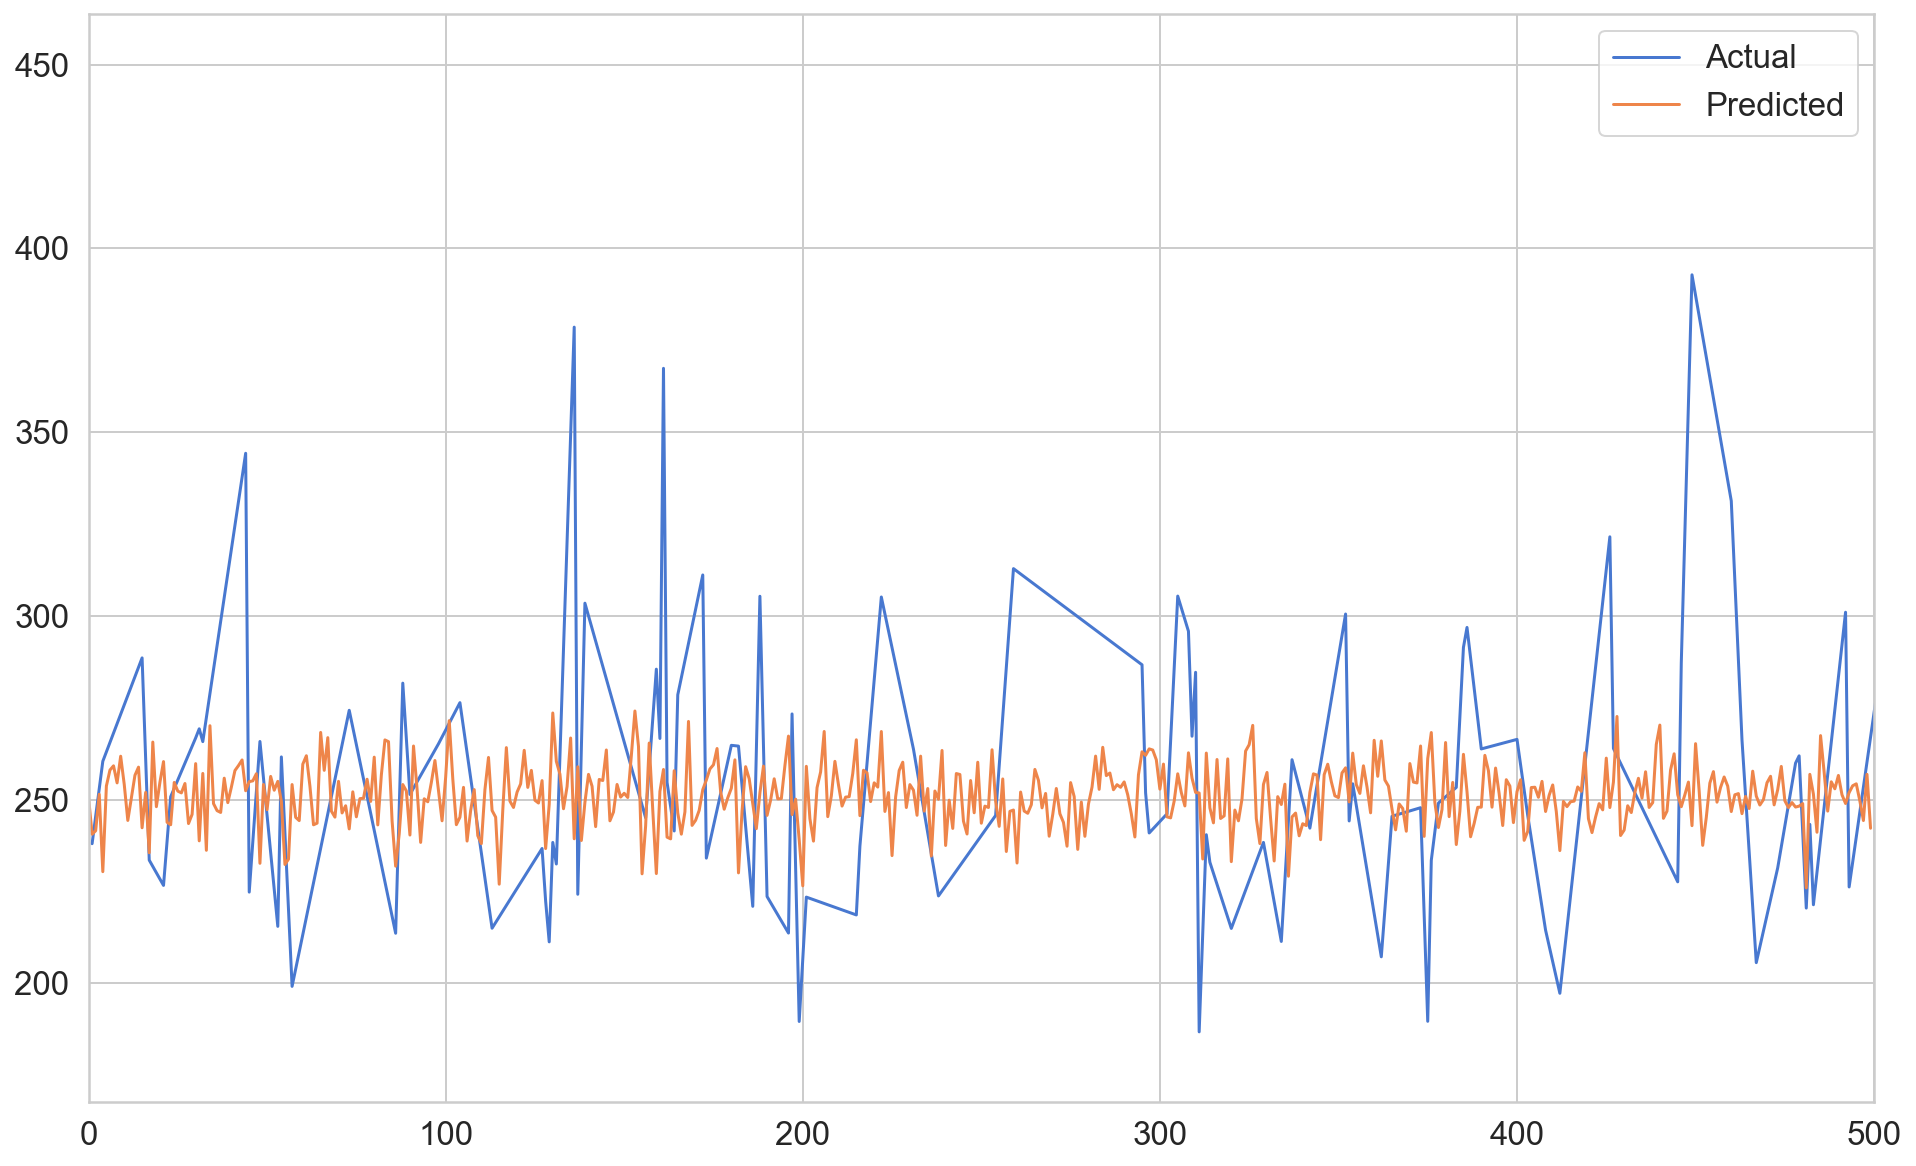

In [742]:
#Graph between Electricity Consumption(x-axis) and first 500 meters (y-axis)
plt.xlim([0, 500]) 
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')

plt.legend()

In [724]:
e=sqrt(mean_squared_error(y_pred,y_test))
m=y_test.mean()
rmse=(e/m)*100
rmse


0    16.674813
dtype: float64

<h2>Moving Average</h2>

predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=318.899704
predicted=329.969098, expected=335.503795
predicted=329.969098, expected=335.503795
predicted=329.969098, expected=296.590909
predicted=322.532833, expected=200.041412
predicted=277.378705, expected=335.503795
predicted=277.378705, expected=335.503795
predicted=290.349667, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335

predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=399.665179
predicted=356.890923, expected=335.503795
predicted=356.890923, expected=335

predicted=334.471881, expected=335.503795
predicted=334.471881, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=342.036745
predicted=337.681445, expected=335.503795
predicted=337.681445, expected=335.503795
predicted=337.681445, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=364.542587
predicted=345.183392, expected=335.503795
predicted=345.183392, expected=341

predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=295.364397
predicted=322.123996, expected=335.503795
predicted=322.123996, expected=335.503795
predicted=322.123996, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=384.643538
predicted=351.883709, expected=335.503795
predicted=351.883709, expected=335.503795
predicted=351.883709, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335.503795
predicted=335.503795, expected=335

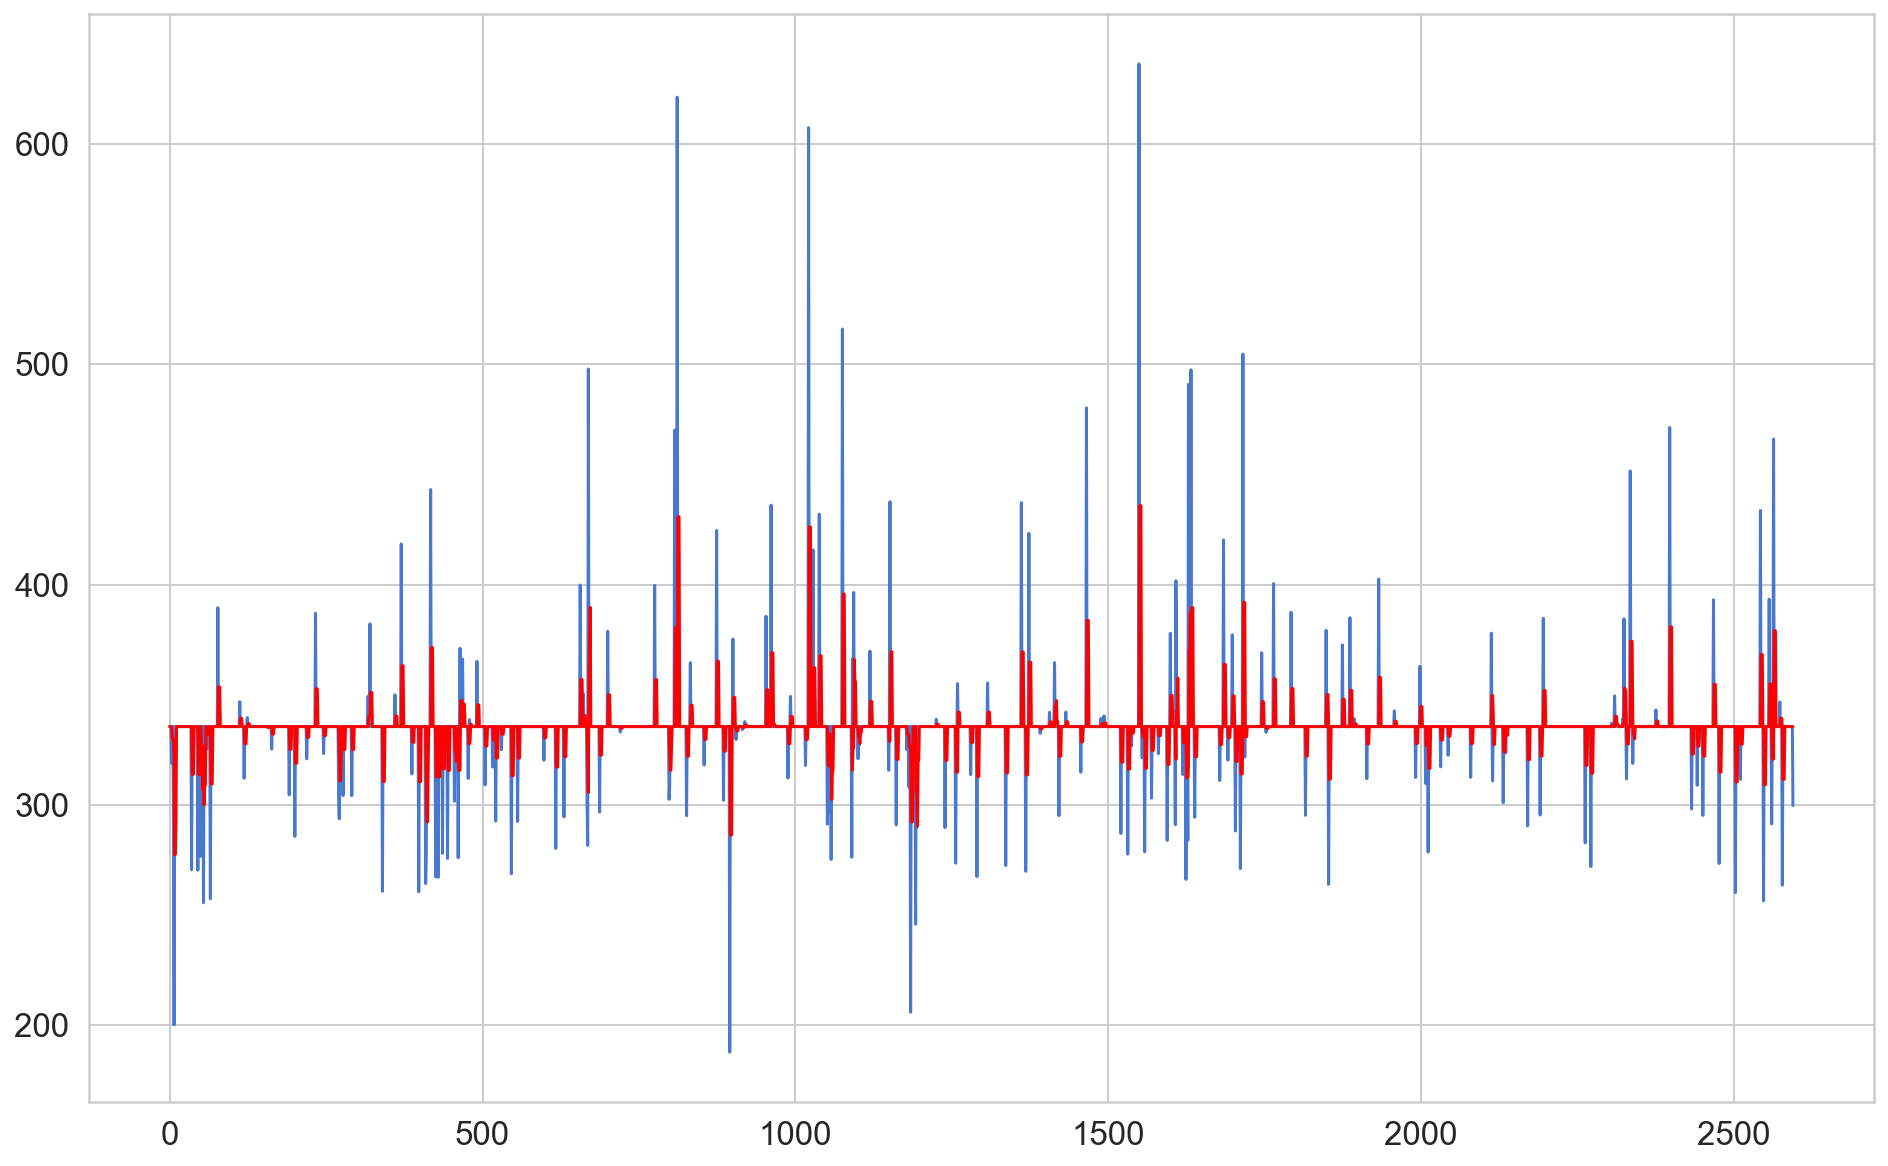

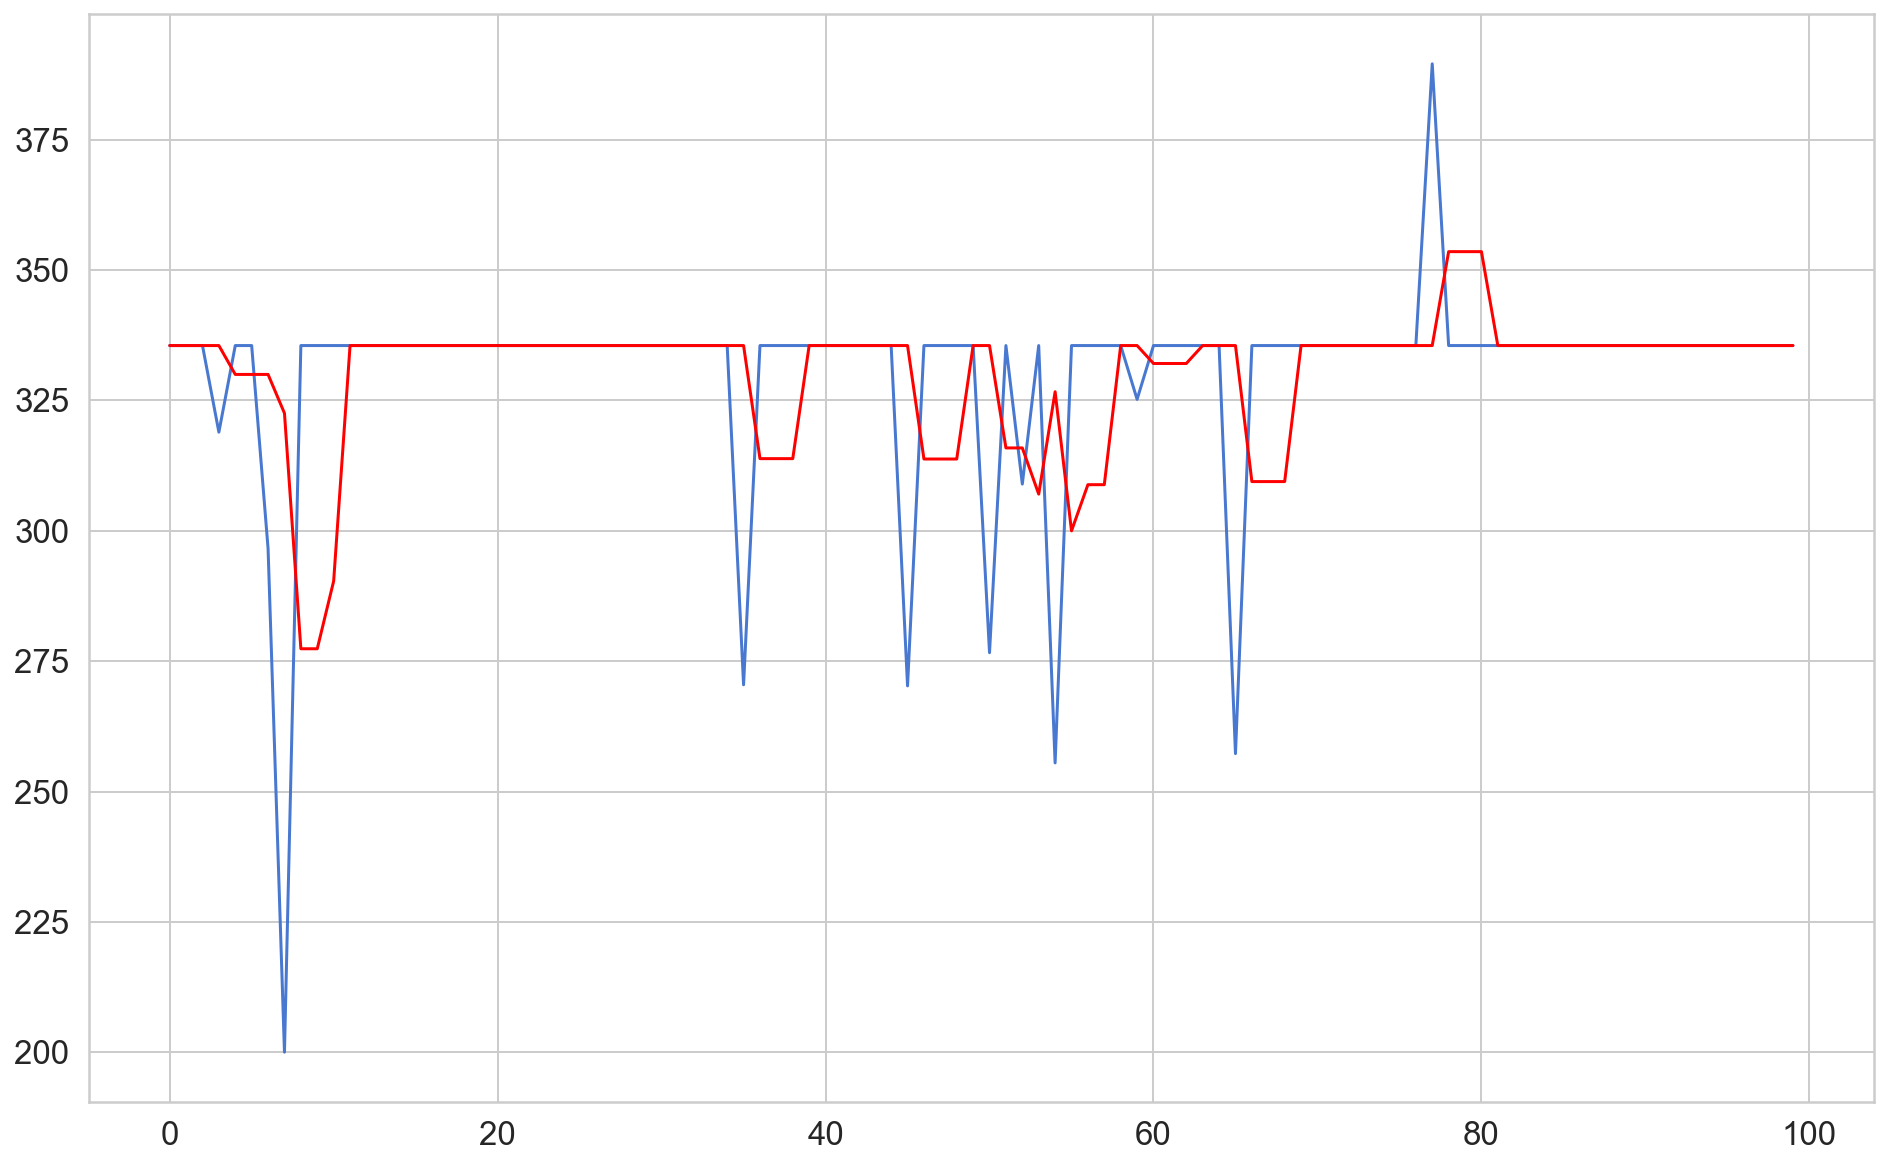

In [746]:
# Finding the average of the elements per window
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
series = train['2017-01-31']
# prepare situation
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[0:100])
pyplot.plot(predictions[0:100], color='red')
pyplot.show()

<h2>Test For Stationarity</h2>

In [160]:
## Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [161]:
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_squared_error
rcParams['figure.figsize'] = 15,6

In [162]:
def test_stationarity(timeseries):
    
    #Determining rolling statistics
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()
    
    #plotting rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    st = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling  Mean & Standard Deviation')
    plt.show()
    
    #Dickey_Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.iloc[:,0].values,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)


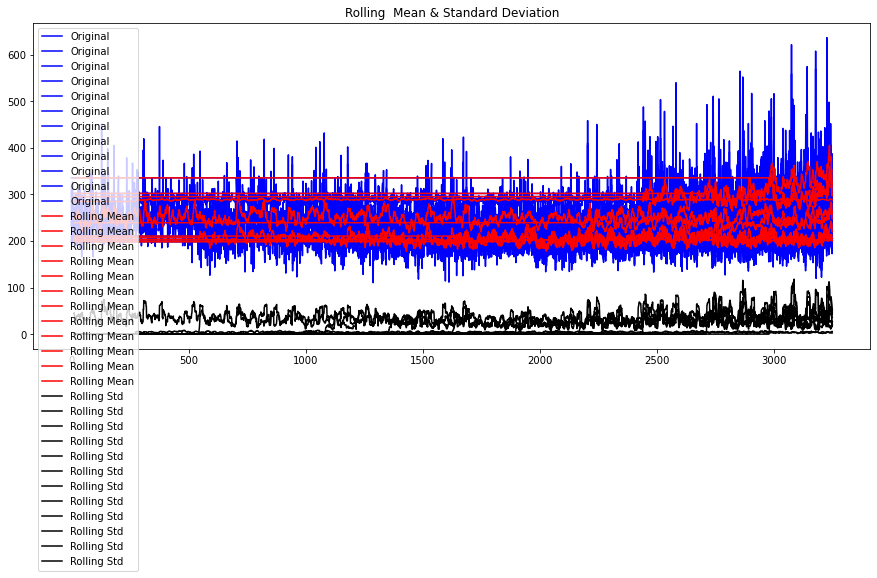

Results of Dickey-Fuller Test:
Test Statistic                -9.603445e+00
p-value                        1.893555e-16
#Lags Used                     2.900000e+01
Number of Observations Used    3.218000e+03
Critical Value (1%)           -3.432384e+00
Critical Value (5%)           -2.862439e+00
Critical Value (10%)          -2.567248e+00
dtype: float64


In [43]:
 test_stationarity(final_con)

In [745]:
#Splitting into test and train
from sklearn.model_selection import train_test_split

train, test = train_test_split(final_con, train_size=0.8)
train

2017-01-31  2017-02-28  2017-03-31  2017-04-30  2017-05-31  2017-06-30  \
2751  335.503795  315.382986  295.550442  258.268760  209.344406  234.657542   
714   335.503795  302.022142  295.227607  239.263382  198.657636  210.520274   
1897  335.503795  302.022142  295.227607  239.263382  153.635546  165.377320   
2796  335.503795  286.997702  288.881677  248.702756  213.956223  236.166429   
1572  335.503795  302.022142  295.227607  239.263382  198.657636  210.520274   
...          ...         ...         ...         ...         ...         ...   
1717  335.503795  302.022142  295.227607  239.263382  198.657636  187.564800   
725   335.503795  302.022142  295.227607  239.263382  198.657636  210.520274   
2635  335.503795  302.022142  273.936358  209.904828  189.423360  204.383193   
1702  335.503795  302.022142  295.227607  239.263382  198.657636  226.309975   
3245  299.614958  267.819541  269.280154  225.925246  179.567537  201.176334   

      2017-07-31  2017-08-31  2017-09-30  2017-10-31  2017-11-30  2017-12-31  
2751  229.365000  242.366463  223.305761  230.930110  337.003532  261.329134  
714   199.190871  202.744049  198.735417  218.615217  278.542769  232.303866  
1897  156.102128  170.340000  159.402938  156.016842  213.214319  209.506789  
2796  200.297964  230.797930  220.268763  219.628275  271.146818  236.617136  
1572  185.202814  181.595077  194.799761  202.680460  325.110027  275.691019  
...          ...         ...         ...         ...         ...         ...  
1717  181.358491  172.960000  171.120600  198.382007  263.409231  209.905051  
725   199.190871  202.744049  198.735417  219.626374  293.041915  251.392208  
2635  190.641951  191.782957  177.277091  179.415385  255.656862  205.250043  
1702  217.812558  217.698683  211.419865  217.285263  273.835683  244.757705  
3245  188.709758  188.614615  185.498228  193.276642  251.474551  221.855054  

[2598 rows x 12 columns]

In [513]:
test

2017-01-31  2017-02-28  2017-03-31  2017-04-30  2017-05-31  2017-06-30  \
1905  335.503795  302.022142  295.227607  239.263382  192.929604  207.058605   
1815  335.503795  302.022142  295.227607  239.263382  198.657636  213.016154   
2004  335.503795  302.022142  295.227607  239.263382  197.915870  208.638881   
321   335.503795  302.022142  295.227607  239.263382  198.657636  210.520274   
2847  335.503795  249.122618  233.915667  198.829034  170.158237  164.087054   
...          ...         ...         ...         ...         ...         ...   
472   335.503795  302.022142  295.227607  239.263382  198.657636  210.520274   
765   335.503795  302.022142  295.227607  239.263382  198.657636  210.520274   
1725  335.503795  302.022142  295.227607  239.263382  198.657636  211.634646   
2179  335.503795  302.022142  295.227607  251.140959  208.544138  232.583415   
2942  335.503795  318.221053  328.058757  264.007186  223.071184  247.626073   

      2017-07-31  2017-08-31  2017-09-30  2017-10-31  2017-11-30  2017-12-31  
1905  189.131707  207.121727  190.772217  193.899647  274.294639  251.712000  
1815  206.512000  208.602137  200.484000  210.433613  286.292687  245.637710  
2004  202.082824  198.957176  197.030291  205.270588  262.309833  242.931349  
321   199.190871  202.744049  198.735417  206.998265  294.625796  258.255576  
2847  158.766406  161.640000  158.754625  156.604905  224.227629  202.355498  
...          ...         ...         ...         ...         ...         ...  
472   199.190871  202.744049  198.735417  206.998265  339.463405  266.219901  
765   199.190871  202.744049  198.735417  278.834140  423.534997  374.030035  
1725  196.403636  210.311379  214.197417  218.605556  291.313138  237.972892  
2179  212.796114  205.944511  211.583586  211.387775  291.390372  259.207378  
2942  211.618432  225.061117  210.313834  235.122013  329.535491  295.858025  

[650 rows x 12 columns]

<h2>Arima</h2>

In [44]:
from statsmodels.tsa.arima_model import ARIMA

In [85]:
import pmdarima as pm
history = [x for x in train[column]]
def find_orders(ts):

    stepwise_model = pm.auto_arima(history, start_p=1, start_q=1, 
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True) # this works 

    return stepwise_model.order, stepwise_model.seasonal_order

In [103]:
for column in train:
        order, seasonal_order = find_orders(train)
    

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=37599.399, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=34384.974, Time=0.36 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=32084.036, Time=1.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=1.03 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=30483.553, Time=0.92 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=1.30 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=22642.326, Time=0.62 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=22643.621, Time=0.55 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=22644.259, Time=0.74 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=22645.594, Time=0.64 sec

Best model:  ARIMA(0,0,3)(0,0,0)[0] intercept
Total fit time: 8.281 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.99 

In [ ]:
#Now fitting the model for each month

<h2>JAN<h2>

In [276]:

model=ARIMA(train['2017-01-31'],order=(0,0,3))
model1=model.fit()
model1.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARMA Model Results                              
===============================================================================
Dep. Variable:     2017-01-31 00:00:00   No. Observations:                 2598
Model:                      ARMA(0, 3)   Log Likelihood              -11316.163
Method:                        css-mle   S.D. of innovations             18.855
Date:                 Fri, 20 Nov 2020   AIC                          22642.326
Time:                         10:47:10   BIC                          22671.638
Sample:                              0   HQIC                         22652.947
                                                                               
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       335.3976      0.388    863.841      0.000     334.637     336.159
ma.L1.2017-01-31 00:00:00     0.0109      0.020      0.556      0.578      -0.028       0.049
ma.L2.2017-01-31 00:00:00     0.0028      0.019      0.145      0.885      -0.035       0.041
ma.L3.2017-01-31 00:00:00     0.0359      0.020      1.817      0.069      -0.003       0.075
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -3.0230           -0.0000j            3.0230           -0.5000
MA.2            1.4725           -2.6529j            3.0342           -0.1694
MA.3            1.4725           +2.6529j            3.0342            0.1694
-----------------------------------------------------------------------------
"""

In [299]:
start=len(train)
print(start)
end=len(train)+len(test)-1
pred1=model1.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(pred1)
type(pred1)

2598
2598    335.399490
2599    335.400819
2600    335.398169
2601    335.397564
2602    335.397564
           ...    
3243    335.397564
3244    335.397564
3245    335.397564
3246    335.397564
3247    335.397564
Name: ARIMA Predictions, Length: 650, dtype: float64


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


pandas.core.series.Series

In [273]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mean=test['2017-01-31'].mean()
print(mean)
rmse=sqrt(mean_squared_error(pred1,test['2017-01-31']))
print(rmse)

335.9283958305729
17.702907811377568


In [217]:
err=(rmse/mean)*100
err=round(err,2)
print(err)

5.27


<h3>Feb</h3>

In [277]:
model=ARIMA(train['2017-02-28'],order=(0,0,3))
model2=model.fit()
model2.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARMA Model Results                              
===============================================================================
Dep. Variable:     2017-02-28 00:00:00   No. Observations:                 2598
Model:                      ARMA(0, 3)   Log Likelihood              -11860.471
Method:                        css-mle   S.D. of innovations             23.250
Date:                 Fri, 20 Nov 2020   AIC                          23730.943
Time:                         10:47:19   BIC                          23760.255
Sample:                              0   HQIC                         23741.564
                                                                               
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       301.9395      0.458    659.148      0.000     301.042     302.837
ma.L1.2017-02-28 00:00:00     0.0072      0.020      0.368      0.713      -0.031       0.046
ma.L2.2017-02-28 00:00:00    -0.0129      0.019     -0.663      0.507      -0.051       0.025
ma.L3.2017-02-28 00:00:00     0.0100      0.020      0.508      0.612      -0.028       0.048
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -4.2063           -0.0000j            4.2063           -0.5000
MA.2            2.7521           -4.0376j            4.8863           -0.1548
MA.3            2.7521           +4.0376j            4.8863            0.1548
-----------------------------------------------------------------------------
"""

In [300]:
start=len(train)
print(start)
end=len(train)+len(test)-1
pred2=model2.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(pred2)


2598
2598    301.926310
2599    301.946108
2600    301.939188
2601    301.939538
2602    301.939538
           ...    
3243    301.939538
3244    301.939538
3245    301.939538
3246    301.939538
3247    301.939538
Name: ARIMA Predictions, Length: 650, dtype: float64


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [221]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mean=test['2017-02-28'].mean()
print(mean)
rmse=sqrt(mean_squared_error(pred2,test['2017-02-28']))
print(rmse)

302.35230474049047
19.268758443202053


In [222]:
err=(rmse/mean)*100
err=round(err,2)
print(err)

6.37


<h3>March</h3>

In [278]:
model=ARIMA(train['2017-03-31'],order=(0,0,3))
model3=model.fit()
model3.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARMA Model Results                              
===============================================================================
Dep. Variable:     2017-03-31 00:00:00   No. Observations:                 2598
Model:                      ARMA(0, 3)   Log Likelihood              -12236.498
Method:                        css-mle   S.D. of innovations             26.871
Date:                 Fri, 20 Nov 2020   AIC                          24482.995
Time:                         10:47:33   BIC                          24512.308
Sample:                              0   HQIC                         24493.616
                                                                               
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       295.3207      0.520    568.221      0.000     294.302     296.339
ma.L1.2017-03-31 00:00:00     0.0112      0.020      0.572      0.567      -0.027       0.050
ma.L2.2017-03-31 00:00:00    -0.0162      0.020     -0.813      0.416      -0.055       0.023
ma.L3.2017-03-31 00:00:00    -0.0092      0.020     -0.468      0.640      -0.048       0.029
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            4.3259           -0.0000j            4.3259           -0.0000
MA.2           -3.0393           -3.9799j            5.0077           -0.3538
MA.3           -3.0393           +3.9799j            5.0077            0.3538
-----------------------------------------------------------------------------
"""

In [301]:
start=len(train)
print(start)
end=len(train)+len(test)-1
pred3=model3.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(pred3)


2598
2598    295.332150
2599    295.330212
2600    295.322841
2601    295.320685
2602    295.320685
           ...    
3243    295.320685
3244    295.320685
3245    295.320685
3246    295.320685
3247    295.320685
Name: ARIMA Predictions, Length: 650, dtype: float64


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [225]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mean=test['2017-03-31'].mean()
print(mean)
rmse=sqrt(mean_squared_error(pred3,test['2017-03-31']))
print(rmse)

294.85558905267317
19.87975495578776


In [226]:
err=(rmse/mean)*100
err=round(err,2)
print(err)

6.74


<h3>April</h3>

In [279]:
model=ARIMA(train['2017-04-30'],order=(0,0,3))
model4=model.fit()
model4.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARMA Model Results                              
===============================================================================
Dep. Variable:     2017-04-30 00:00:00   No. Observations:                 2598
Model:                      ARMA(0, 3)   Log Likelihood              -11463.607
Method:                        css-mle   S.D. of innovations             19.956
Date:                 Fri, 20 Nov 2020   AIC                          22937.214
Time:                         10:48:15   BIC                          22966.527
Sample:                              0   HQIC                         22947.835
                                                                               
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       239.3609      0.374    639.568      0.000     238.627     240.094
ma.L1.2017-04-30 00:00:00    -0.0073      0.020     -0.373      0.709      -0.046       0.031
ma.L2.2017-04-30 00:00:00    -0.0116      0.020     -0.590      0.555      -0.050       0.027
ma.L3.2017-04-30 00:00:00    -0.0252      0.019     -1.311      0.190      -0.063       0.012
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            3.2355           -0.0000j            3.2355           -0.0000
MA.2           -1.8475           -2.9718j            3.4993           -0.3385
MA.3           -1.8475           +2.9718j            3.4993            0.3385
-----------------------------------------------------------------------------
"""

In [228]:
start=len(train)
print(start)
end=len(train)+len(test)-1
pred4=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(pred4)

2598
2598    239.378478
2599    239.379388
2600    239.375399
2601    239.360928
2602    239.360928
           ...    
3243    239.360928
3244    239.360928
3245    239.360928
3246    239.360928
3247    239.360928
Name: ARIMA Predictions, Length: 650, dtype: float64


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [229]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mean=test['2017-04-30'].mean()
print(mean)
rmse=sqrt(mean_squared_error(pred4,test['2017-04-30']))
print(rmse)

238.87367339258552
17.276863937329107


In [230]:
err=(rmse/mean)*100
err=round(err,2)
print(err)

7.23


<h3>May</h3>

In [280]:
model=ARIMA(train['2017-05-31'],order=(0,0,3))
model5=model.fit()
model5.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARMA Model Results                              
===============================================================================
Dep. Variable:     2017-05-31 00:00:00   No. Observations:                 2598
Model:                      ARMA(0, 3)   Log Likelihood              -10773.882
Method:                        css-mle   S.D. of innovations             15.303
Date:                 Fri, 20 Nov 2020   AIC                          21557.765
Time:                         10:48:22   BIC                          21587.077
Sample:                              0   HQIC                         21568.386
                                                                               
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       198.6543      0.285    697.428      0.000     198.096     199.213
ma.L1.2017-05-31 00:00:00    -0.0327      0.020     -1.662      0.096      -0.071       0.006
ma.L2.2017-05-31 00:00:00     0.0003      0.019      0.014      0.989      -0.037       0.037
ma.L3.2017-05-31 00:00:00    -0.0189      0.020     -0.937      0.349      -0.058       0.021
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            3.6062           -0.0000j            3.6062           -0.0000
MA.2           -1.7960           -3.3852j            3.8321           -0.3276
MA.3           -1.7960           +3.3852j            3.8321            0.3276
-----------------------------------------------------------------------------
"""

In [232]:
start=len(train)
print(start)
end=len(train)+len(test)-1
pred5=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(pred5)


2598
2598    198.670607
2599    198.660928
2600    198.659134
2601    198.654278
2602    198.654278
           ...    
3243    198.654278
3244    198.654278
3245    198.654278
3246    198.654278
3247    198.654278
Name: ARIMA Predictions, Length: 650, dtype: float64


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [233]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mean=test['2017-05-31'].mean()
print(mean)
rmse=sqrt(mean_squared_error(pred5,test['2017-05-31']))
print(rmse)

198.67326577857355
14.536292892960661


In [234]:
err=(rmse/mean)*100
err=round(err,2)
print(err)

7.32


<h3>June</h3>

In [281]:
model=ARIMA(train['2017-06-30'],order=(0,0,3))
model6=model.fit()
model6.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARMA Model Results                              
===============================================================================
Dep. Variable:     2017-06-30 00:00:00   No. Observations:                 2598
Model:                      ARMA(0, 3)   Log Likelihood              -11402.282
Method:                        css-mle   S.D. of innovations             19.491
Date:                 Fri, 20 Nov 2020   AIC                          22814.565
Time:                         10:48:36   BIC                          22843.877
Sample:                              0   HQIC                         22825.186
                                                                               
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       210.3678      0.371    567.284      0.000     209.641     211.095
ma.L1.2017-06-30 00:00:00     0.0134      0.020      0.682      0.495      -0.025       0.052
ma.L2.2017-06-30 00:00:00    -0.0053      0.019     -0.274      0.784      -0.043       0.032
ma.L3.2017-06-30 00:00:00    -0.0384      0.020     -1.962      0.050      -0.077   -4.51e-05
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            2.9585           -0.0000j            2.9585           -0.0000
MA.2           -1.5482           -2.5327j            2.9684           -0.3373
MA.3           -1.5482           +2.5327j            2.9684            0.3373
-----------------------------------------------------------------------------
"""

In [236]:
start=len(train)
print(start)
end=len(train)+len(test)-1
pred6=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(pred6)


2598
2598    210.368487
2599    210.496739
2600    210.382548
2601    210.367806
2602    210.367806
           ...    
3243    210.367806
3244    210.367806
3245    210.367806
3246    210.367806
3247    210.367806
Name: ARIMA Predictions, Length: 650, dtype: float64


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [239]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mean=test['2017-06-30'].mean()
print(mean)
rmse=sqrt(mean_squared_error(pred6,test['2017-06-30']))
print(rmse)

211.1310727774547
20.429267532678352


In [240]:
err=(rmse/mean)*100
err=round(err,2)
print(err)

9.68


<h3>July</h3>

In [282]:
model=ARIMA(train['2017-07-31'],order=(0,0,3))
model7=model.fit()
model7.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARMA Model Results                              
===============================================================================
Dep. Variable:     2017-07-31 00:00:00   No. Observations:                 2598
Model:                      ARMA(0, 3)   Log Likelihood              -11311.015
Method:                        css-mle   S.D. of innovations             18.818
Date:                 Fri, 20 Nov 2020   AIC                          22632.030
Time:                         10:48:44   BIC                          22661.343
Sample:                              0   HQIC                         22642.651
                                                                               
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       199.0677      0.358    555.306      0.000     198.365     199.770
ma.L1.2017-07-31 00:00:00     0.0192      0.020      0.979      0.328      -0.019       0.058
ma.L2.2017-07-31 00:00:00    -0.0102      0.019     -0.526      0.599      -0.048       0.028
ma.L3.2017-07-31 00:00:00    -0.0380      0.019     -1.958      0.050      -0.076    3.89e-05
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            2.9415           -0.0000j            2.9415           -0.0000
MA.2           -1.6049           -2.5221j            2.9894           -0.3402
MA.3           -1.6049           +2.5221j            2.9894            0.3402
-----------------------------------------------------------------------------
"""

In [242]:
start=len(train)
print(start)
end=len(train)+len(test)-1
pred7=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(pred7)


2598
2598    198.977183
2599    198.759028
2600    199.073632
2601    199.067724
2602    199.067724
           ...    
3243    199.067724
3244    199.067724
3245    199.067724
3246    199.067724
3247    199.067724
Name: ARIMA Predictions, Length: 650, dtype: float64


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [243]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mean=test['2017-07-31'].mean()
print(mean)
rmse=sqrt(mean_squared_error(pred7,test['2017-07-31']))
print(rmse)

199.68351361540687
20.30649377348745


In [244]:
err=(rmse/mean)*100
err=round(err,2)
print(err)

10.17


<h3>August</h3>

In [283]:
model=ARIMA(train['2017-08-31'],order=(0,0,3))
model8=model.fit()
model8.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARMA Model Results                              
===============================================================================
Dep. Variable:     2017-08-31 00:00:00   No. Observations:                 2598
Model:                      ARMA(0, 3)   Log Likelihood              -11553.793
Method:                        css-mle   S.D. of innovations             20.661
Date:                 Fri, 20 Nov 2020   AIC                          23117.587
Time:                         10:48:54   BIC                          23146.899
Sample:                              0   HQIC                         23128.208
                                                                               
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       202.5426      0.391    518.408      0.000     201.777     203.308
ma.L1.2017-08-31 00:00:00     0.0034      0.020      0.174      0.862      -0.035       0.042
ma.L2.2017-08-31 00:00:00    -0.0116      0.020     -0.582      0.561      -0.051       0.027
ma.L3.2017-08-31 00:00:00    -0.0280      0.019     -1.455      0.146      -0.066       0.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            3.1726           -0.0000j            3.1726           -0.0000
MA.2           -1.7934           -2.8357j            3.3552           -0.3398
MA.3           -1.7934           +2.8357j            3.3552            0.3398
-----------------------------------------------------------------------------
"""

In [246]:
start=len(train)
print(start)
end=len(train)+len(test)-1
pred8=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(pred8)


2598
2598    202.267439
2599    202.262282
2600    203.069139
2601    202.542601
2602    202.542601
           ...    
3243    202.542601
3244    202.542601
3245    202.542601
3246    202.542601
3247    202.542601
Name: ARIMA Predictions, Length: 650, dtype: float64


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [247]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mean=test['2017-08-31'].mean()
print(mean)
rmse=sqrt(mean_squared_error(pred8,test['2017-08-31']))
print(rmse)

203.55101534292092
21.87976161132357


In [248]:
err=(rmse/mean)*100
err=round(err,2)
print(err)

10.75


<h3>September</h3>

In [284]:
model=ARIMA(train['2017-09-30'],order=(0,0,3))
model9=model.fit()
model9.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARMA Model Results                              
===============================================================================
Dep. Variable:     2017-09-30 00:00:00   No. Observations:                 2598
Model:                      ARMA(0, 3)   Log Likelihood               -6516.281
Method:                        css-mle   S.D. of innovations              2.972
Date:                 Fri, 20 Nov 2020   AIC                          13042.562
Time:                         10:49:04   BIC                          13071.875
Sample:                              0   HQIC                         13053.183
                                                                               
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       200.8893      0.057   3502.930      0.000     200.777     201.002
ma.L1.2017-09-30 00:00:00     0.0041      0.020      0.211      0.833      -0.034       0.043
ma.L2.2017-09-30 00:00:00     0.0135      0.019      0.702      0.483      -0.024       0.051
ma.L3.2017-09-30 00:00:00    -0.0341      0.020     -1.731      0.084      -0.073       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.4191           -2.6539j            3.0095           -0.3282
MA.2           -1.4191           +2.6539j            3.0095            0.3282
MA.3            3.2338           -0.0000j            3.2338           -0.0000
-----------------------------------------------------------------------------
"""

In [250]:
start=len(train)
print(start)
end=len(train)+len(test)-1
pred9=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(pred9)


2598
2598    200.985938
2599    200.826713
2600    200.904567
2601    200.889276
2602    200.889276
           ...    
3243    200.889276
3244    200.889276
3245    200.889276
3246    200.889276
3247    200.889276
Name: ARIMA Predictions, Length: 650, dtype: float64


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [251]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mean=test['2017-09-30'].mean()
print(mean)
rmse=sqrt(mean_squared_error(pred9,test['2017-09-30']))
print(rmse)

200.96880349696812
3.1408393171992866


In [252]:
err=(rmse/mean)*100
err=round(err,2)
print(err)

1.56


<h3>October</h3>

In [285]:
model=ARIMA(train['2017-10-31'],order=(0,0,3))
model10=model.fit()
model10.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARMA Model Results                              
===============================================================================
Dep. Variable:     2017-10-31 00:00:00   No. Observations:                 2598
Model:                      ARMA(0, 3)   Log Likelihood              -12638.513
Method:                        css-mle   S.D. of innovations             31.367
Date:                 Fri, 20 Nov 2020   AIC                          25287.026
Time:                         10:49:12   BIC                          25316.338
Sample:                              0   HQIC                         25297.647
                                                                               
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       207.0497      0.613    337.842      0.000     205.849     208.251
ma.L1.2017-10-31 00:00:00    -0.0023      0.020     -0.116      0.908      -0.041       0.036
ma.L2.2017-10-31 00:00:00    -0.0058      0.020     -0.298      0.766      -0.044       0.033
ma.L3.2017-10-31 00:00:00     0.0040      0.020      0.196      0.844      -0.036       0.044
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -5.8834           -0.0000j            5.8834           -0.5000
MA.2            3.6748           -5.4004j            6.5321           -0.1549
MA.3            3.6748           +5.4004j            6.5321            0.1549
-----------------------------------------------------------------------------
"""

In [254]:
start=len(train)
print(start)
end=len(train)+len(test)-1
pred10=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(pred10)


2598
2598    207.122027
2599    207.188567
2600    206.979859
2601    207.049697
2602    207.049697
           ...    
3243    207.049697
3244    207.049697
3245    207.049697
3246    207.049697
3247    207.049697
Name: ARIMA Predictions, Length: 650, dtype: float64


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [255]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mean=test['2017-10-31'].mean()
print(mean)
rmse=sqrt(mean_squared_error(pred10,test['2017-10-31']))
print(rmse)

206.7926960049178
31.366414398081105


In [256]:
err=(rmse/mean)*100
err=round(err,2)
print(err)

15.17


<h3>November</h3>

In [286]:
model=ARIMA(train['2017-11-30'],order=(0,0,3))
model11=model.fit()
model11.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARMA Model Results                              
===============================================================================
Dep. Variable:     2017-11-30 00:00:00   No. Observations:                 2598
Model:                      ARMA(0, 3)   Log Likelihood               -7657.929
Method:                        css-mle   S.D. of innovations              4.612
Date:                 Fri, 20 Nov 2020   AIC                          15325.858
Time:                         10:49:21   BIC                          15355.170
Sample:                              0   HQIC                         15336.479
                                                                               
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       288.4731      0.094   3060.397      0.000     288.288     288.658
ma.L1.2017-11-30 00:00:00     0.0095      0.020      0.484      0.628      -0.029       0.048
ma.L2.2017-11-30 00:00:00     0.0208      0.019      1.085      0.278      -0.017       0.058
ma.L3.2017-11-30 00:00:00     0.0115      0.020      0.582      0.561      -0.027       0.050
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.6230           -3.8226j            4.1528           -0.1861
MA.2            1.6230           +3.8226j            4.1528            0.1861
MA.3           -5.0576           -0.0000j            5.0576           -0.5000
-----------------------------------------------------------------------------
"""

In [258]:
start=len(train)
print(start)
end=len(train)+len(test)-1
pred11=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(pred11)


2598
2598    288.613006
2599    288.494164
2600    288.479918
2601    288.473075
2602    288.473075
           ...    
3243    288.473075
3244    288.473075
3245    288.473075
3246    288.473075
3247    288.473075
Name: ARIMA Predictions, Length: 650, dtype: float64


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [259]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mean=test['2017-11-30'].mean()
print(mean)
rmse=sqrt(mean_squared_error(pred11,test['2017-11-30']))
print(rmse)

288.48836376291524
4.500352887542412


In [260]:
err=(rmse/mean)*100
err=round(err,2)
print(err)

1.56


<h3>December</h3>

In [287]:
model=ARIMA(train['2017-12-31'],order=(0,0,3))
model12=model.fit()
model12.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARMA Model Results                              
===============================================================================
Dep. Variable:     2017-12-31 00:00:00   No. Observations:                 2598
Model:                      ARMA(0, 3)   Log Likelihood              -13340.890
Method:                        css-mle   S.D. of innovations             41.105
Date:                 Fri, 20 Nov 2020   AIC                          26691.780
Time:                         10:49:28   BIC                          26721.093
Sample:                              0   HQIC                         26702.401
                                                                               
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       251.6725      0.811    310.399      0.000     250.083     253.262
ma.L1.2017-12-31 00:00:00     0.0177      0.020      0.902      0.367      -0.021       0.056
ma.L2.2017-12-31 00:00:00     0.0018      0.019      0.093      0.926      -0.036       0.040
ma.L3.2017-12-31 00:00:00    -0.0141      0.020     -0.717      0.473      -0.053       0.024
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -2.0780           -3.4972j            4.0679           -0.3353
MA.2           -2.0780           +3.4972j            4.0679            0.3353
MA.3            4.2838           -0.0000j            4.2838           -0.0000
-----------------------------------------------------------------------------
"""

In [262]:
start=len(train)
print(start)
end=len(train)+len(test)-1
pred12=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(pred12)


2598
2598    251.303542
2599    251.485156
2600    251.876618
2601    251.672500
2602    251.672500
           ...    
3243    251.672500
3244    251.672500
3245    251.672500
3246    251.672500
3247    251.672500
Name: ARIMA Predictions, Length: 650, dtype: float64


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [263]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mean=test['2017-12-31'].mean()
print(mean)
rmse=sqrt(mean_squared_error(pred12,test['2017-12-31']))
print(rmse)

250.27189250960598
40.11191274517704


In [264]:
err=(rmse/mean)*100
err=round(err,2)
print(err)

16.03


<h3>Mean error</h3>

In [209]:
mean_err=(16.03+1.56+15.17+1.56+10.75+10.17+9.68+7.32+7.23+6.74+6.37+5.27)/12

In [211]:
round(mean_err,2)

8.15

In [ ]:
#Now we will predict the consumption for each month based on its model trained

<h2>Final</h2>

In [314]:
start=0
end=len(final_con)
predd1=model1.predict(start=start,end=end,typ='levels').rename('January')
a=predd1.to_frame()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [315]:
start=0
end=len(final_con)
predd2=model2.predict(start=start,end=end,typ='levels').rename('February')
b=predd2.to_frame()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [318]:
start=0
end=len(final_con)
predd3=model3.predict(start=start,end=end,typ='levels').rename('March')
c=predd3.to_frame()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [317]:
start=0
end=len(final_con)
predd4=model4.predict(start=start,end=end,typ='levels').rename('April')
d=predd4.to_frame()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [319]:
start=0
end=len(final_con)
predd5=model5.predict(start=start,end=end,typ='levels').rename('May')
e=predd5.to_frame()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [320]:
start=0
end=len(final_con)
predd6=model6.predict(start=start,end=end,typ='levels').rename('June')
f=predd6.to_frame()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [321]:
start=0
end=len(final_con)
predd7=model7.predict(start=start,end=end,typ='levels').rename('July')
g=predd7.to_frame()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [322]:
start=0
end=len(final_con)
predd8=model8.predict(start=start,end=end,typ='levels').rename('August')
h=predd8.to_frame()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [327]:
start=0
end=len(final_con)
predd9=model9.predict(start=start,end=end,typ='levels').rename('September')
i=predd9.to_frame()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [328]:
start=0
end=len(final_con)
predd10=model10.predict(start=start,end=end,typ='levels').rename('October')
j=predd10.to_frame()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [329]:
start=0
end=len(final_con)
predd11=model11.predict(start=start,end=end,typ='levels').rename('November')
k=predd11.to_frame()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [330]:
start=0
end=len(final_con)
predd12=model12.predict(start=start,end=end,typ='levels').rename('December')
l=predd12.to_frame()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [332]:
final = [a,b,c,d,e,f,g,h,i,j,k,l]

In [359]:
#final prediction
result1 = pd.concat(final,axis=1)
result1

January    February       March       April         May        June  \
0     335.397564  301.939538  295.320685  239.360928  198.654278  210.367806   
1     335.398734  301.940115  295.319644  239.361604  199.555256  210.032053   
2     335.399057  301.939057  295.321151  239.362728  198.659152  210.518548   
3     335.402808  301.939899  295.321979  239.365250  199.174195  211.317816   
4     335.402728  301.939874  295.125751  239.513161  198.731800  210.276961   
...          ...         ...         ...         ...         ...         ...   
3244  335.397564  301.939538  295.320685  239.360928  198.654278  210.367806   
3245  335.397564  301.939538  295.320685  239.360928  198.654278  210.367806   
3246  335.397564  301.939538  295.320685  239.360928  198.654278  210.367806   
3247  335.397564  301.939538  295.320685  239.360928  198.654278  210.367806   
3248  335.397564  301.939538  295.320685  239.360928  198.654278  210.367806   

            July      August   September     October    November    December  
0     199.067724  202.542601  200.889276  207.049697  288.473075  251.672500  
1     198.633939  202.453411  200.887003  207.114082  288.489564  251.141185  
2     199.323202  202.825888  200.873224  207.144238  288.536383  251.782623  
3     199.910113  203.168535  200.883471  206.793705  288.563332  251.646671  
4     199.032200  202.735967  200.961476  207.289824  288.539335  251.142999  
...          ...         ...         ...         ...         ...         ...  
3244  199.067724  202.542601  200.889276  207.049697  288.473075  251.672500  
3245  199.067724  202.542601  200.889276  207.049697  288.473075  251.672500  
3246  199.067724  202.542601  200.889276  207.049697  288.473075  251.672500  
3247  199.067724  202.542601  200.889276  207.049697  288.473075  251.672500  
3248  199.067724  202.542601  200.889276  207.049697  288.473075  251.672500  

[3249 rows x 12 columns]

In [348]:
result.to_csv('finale.csv') 

In [349]:
c=pd.read_csv('consumption.csv')
result.insert(0,'meter_id', c['meter_id'])

In [350]:
result

meter_id     January    February  \
0     0xa62b9f23553ff183f61e2bf943aab3d5983d02d7  335.397564  301.939538   
1     0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da  335.398734  301.940115   
2     0x4a1ed36825360a058cec2bdd409fc2459e1ce54f  335.399057  301.939057   
3     0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407  335.402808  301.939899   
4     0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f  335.402728  301.939874   
...                                          ...         ...         ...   
3244  0xfdaf9f857621ec06f2cf801f42a020a322835090  335.397564  301.939538   
3245  0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18  335.397564  301.939538   
3246  0x47218b46abb2fcaade487a211911406dc6e13730  335.397564  301.939538   
3247  0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd  335.397564  301.939538   
3248                                         NaN  335.397564  301.939538   

           March       April         May        June        July      August  \
0     295.320685  239.360928  198.654278  210.367806  199.067724  202.542601   
1     295.319644  239.361604  199.555256  210.032053  198.633939  202.453411   
2     295.321151  239.362728  198.659152  210.518548  199.323202  202.825888   
3     295.321979  239.365250  199.174195  211.317816  199.910113  203.168535   
4     295.125751  239.513161  198.731800  210.276961  199.032200  202.735967   
...          ...         ...         ...         ...         ...         ...   
3244  295.320685  239.360928  198.654278  210.367806  199.067724  202.542601   
3245  295.320685  239.360928  198.654278  210.367806  199.067724  202.542601   
3246  295.320685  239.360928  198.654278  210.367806  199.067724  202.542601   
3247  295.320685  239.360928  198.654278  210.367806  199.067724  202.542601   
3248  295.320685  239.360928  198.654278  210.367806  199.067724  202.542601   

       September     October    November    December  
0     200.889276  207.049697  288.473075  251.672500  
1     200.887003  207.114082  288.489564  251.141185  
2     200.873224  207.144238  288.536383  251.782623  
3     200.883471  206.793705  288.563332  251.646671  
4     200.961476  207.289824  288.539335  251.142999  
...          ...         ...         ...         ...  
3244  200.889276  207.049697  288.473075  251.672500  
3245  200.889276  207.049697  288.473075  251.672500  
3246  200.889276  207.049697  288.473075  251.672500  
3247  200.889276  207.049697  288.473075  251.672500  
3248  200.889276  207.049697  288.473075  251.672500  

[3249 rows x 13 columns]

In [351]:
result.to_csv('finale.csv') 

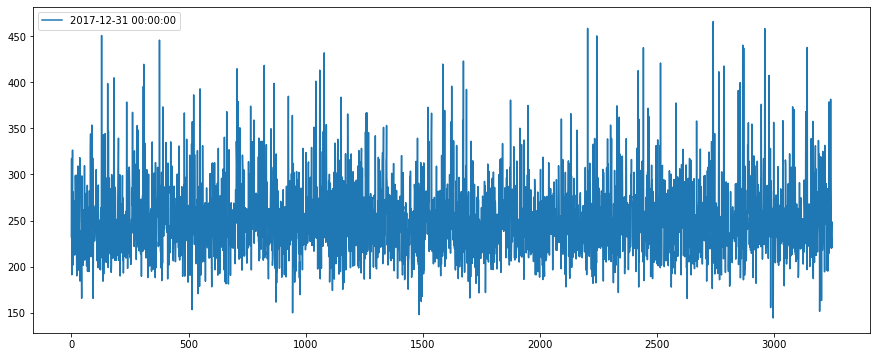

In [372]:
final_con['2017-12-31'].plot(legend=True)


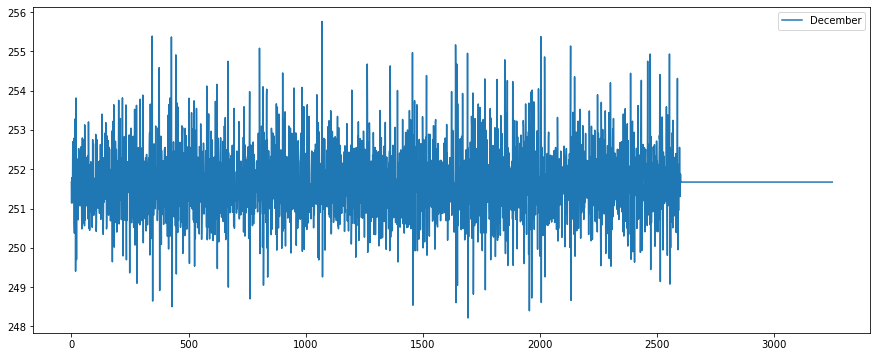

In [373]:
predd12.plot(legend=True)


In [540]:
final_lstm=final_df
final_reg=final_df

In [516]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [517]:
# Train test split
train_size = int(len(final_lstm) * 0.8)
test_size = len(final_lstm) - train_size
train, test = final_lstm.iloc[0:train_size], final_lstm.iloc[train_size:len(final_lstm)]
print(len(train), len(test))

2598 650


In [518]:
train


2017-01-31  2017-02-28  2017-03-31  2017-04-30  2017-05-31  2017-06-30  \
0     335.503795  302.022142  295.227607  239.263382  198.657636  210.520274   
1     335.503795  302.022142  295.227607  239.263382  198.657636  210.520274   
2     335.503795  302.022142  295.227607  239.263382  198.657636  210.520274   
3     335.503795  302.022142  295.227607  239.263382  198.657636  210.520274   
4     335.503795  302.022142  295.227607  239.263382  198.657636  210.520274   
...          ...         ...         ...         ...         ...         ...   
2593  335.503795  302.022142  326.174552  253.557704  211.459210  223.685073   
2594  335.503795  302.022142  324.000344  272.359496  245.449032  268.982454   
2595  335.503795  302.022142  301.782732  246.502857  205.531065  212.182857   
2596  335.503795  302.022142  389.845794  318.909375  280.206720  313.239335   
2597  335.503795  302.022142  273.627700  206.790160  186.367514  179.590459   

      2017-07-31  2017-08-31  2017-09-30  2017-10-31  2017-11-30  2017-12-31  
0     199.190871  202.744049  198.735417  206.998265  284.785561  232.342419  
1     199.190871  202.744049  198.735417  206.998265  284.785561  317.296000  
2     199.190871  202.744049  198.735417  206.998265  284.785561  191.289231  
3     199.190871  202.744049  198.735417  206.998265  284.785561  202.323731  
4     199.190871  202.744049  198.735417  206.998265  284.785561  297.763349  
...          ...         ...         ...         ...         ...         ...  
2593  203.693217  207.408706  207.522462  235.232967  326.522299  268.302385  
2594  254.428841  292.211163  255.302899  267.035952  315.120060  267.856467  
2595  200.762553  216.593333  219.287987  217.819108  321.585031  273.458233  
2596  311.311698  302.897238  290.868783  305.276023  371.434804  306.126137  
2597  181.145806  173.291881  172.167329  176.735294  252.533009  237.204622  

[2598 rows x 12 columns]

<h2>LSTM</h2>


In [256]:
final_lstm


2017-01-31  2017-02-28  2017-03-31  2017-04-30  2017-05-31  2017-06-30  \
0     330.331870  302.022142  295.227607  239.263382  198.657636  210.520274   
1     330.331870  302.022142  295.227607  239.263382  198.657636  210.520274   
2     330.331870  302.022142  295.227607  239.263382  198.657636  210.520274   
3     330.331870  302.022142  295.227607  239.263382  198.657636  210.520274   
4     330.331870  302.022142  295.227607  239.263382  198.657636  210.520274   
...          ...         ...         ...         ...         ...         ...   
3243  259.985455  233.465436  242.097600  238.153043  197.567242  207.468235   
3244  335.682896  303.520000  305.504563  285.420000  230.084918  262.658028   
3245  300.399731  267.819541  269.280154  225.925246  179.567537  201.176334   
3246  295.432336  278.926884  263.730879  226.133832  194.899237  181.923067   
3247  280.028571  386.846242  298.494612  231.482130  198.260499  210.677815   

      2017-07-31  2017-08-31  2017-09-30  2017-10-31  2017-11-30  2017-12-31  
0     199.190871  202.744049  198.735417  206.998265  284.785561  232.342419  
1     199.190871  202.744049  198.735417  206.998265  284.785561  317.296000  
2     199.190871  202.744049  198.735417  206.998265  284.785561  191.289231  
3     199.190871  202.744049  198.735417  206.998265  284.785561  202.323731  
4     199.190871  202.744049  198.735417  206.998265  284.785561  297.763349  
...          ...         ...         ...         ...         ...         ...  
3243  200.728145  192.020038  195.993290  217.285106  298.986037  219.958348  
3244  181.991707  198.003103  183.515056  185.287310  254.146286  231.155702  
3245  188.709758  188.614615  185.498228  193.276642  251.474551  221.855054  
3246  172.636364  184.677551  177.739636  208.897590  282.378947  220.689330  
3247  204.572021  204.398049  194.253544  215.330233  284.409366  248.180504  

[3248 rows x 12 columns]

In [526]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [527]:


# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)



In [528]:
train.iloc[1]

2017-01-31    335.503795
2017-02-28    302.022142
2017-03-31    295.227607
2017-04-30    239.263382
2017-05-31    198.657636
2017-06-30    210.520274
2017-07-31    199.190871
2017-08-31    202.744049
2017-09-30    198.735417
2017-10-31    206.998265
2017-11-30    284.785561
2017-12-31    317.296000
Freq: M, Name: 1, dtype: float64

In [529]:
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(train.iloc[1], n_steps)

In [743]:
#print(X),print(y)
X.shape

(2498, 100)

In [531]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [532]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 5s 5s/step - loss: 51161.5000
Epoch 2/300
1/1 [==============================] - 0s 0s/step - loss: 50311.9727
Epoch 3/300
1/1 [==============================] - 0s 16ms/step - loss: 49577.7461
Epoch 4/300
1/1 [==============================] - 0s 16ms/step - loss: 48925.1914
Epoch 5/300
1/1 [==============================] - 0s 16ms/step - loss: 48260.0273
Epoch 6/300
1/1 [==============================] - 0s 16ms/step - loss: 47536.3672
Epoch 7/300
1/1 [==============================] - 0s 0s/step - loss: 46732.9922
Epoch 8/300
1/1 [==============================] - 0s 7ms/step - loss: 45857.2109
Epoch 9/300
1/1 [==============================] - 0s 0s/step - loss: 44842.4258
Epoch 10/300
1/1 [==============================] - 0s 0s/step - loss: 43566.2305
Epoch 11/300
1/1 [==============================] - 0s 16ms/step - loss: 42158.6719
Epoch 12/300
1/1 [==============================] - 0s 16ms/step - loss: 40856.7969
Epoch 13/300

1/1 [==============================] - 0s 0s/step - loss: 28.6157
Epoch 200/300
1/1 [==============================] - 0s 16ms/step - loss: 46.8648
Epoch 201/300
1/1 [==============================] - 0s 0s/step - loss: 73.4595
Epoch 202/300
1/1 [==============================] - 0s 0s/step - loss: 36.7413
Epoch 203/300
1/1 [==============================] - 0s 16ms/step - loss: 45.3486
Epoch 204/300
1/1 [==============================] - 0s 0s/step - loss: 59.6047
Epoch 205/300
1/1 [==============================] - 0s 16ms/step - loss: 25.9371
Epoch 206/300
1/1 [==============================] - 0s 16ms/step - loss: 66.4808
Epoch 207/300
1/1 [==============================] - 0s 7ms/step - loss: 82.1435
Epoch 208/300
1/1 [==============================] - 0s 0s/step - loss: 43.8602
Epoch 209/300
1/1 [==============================] - 0s 0s/step - loss: 92.8528
Epoch 210/300
1/1 [==============================] - 0s 16ms/step - loss: 31.4058
Epoch 211/300
1/1 [========================

1/1 [==============================] - 0s 0s/step - loss: 19.2340


In [533]:
from numpy import array
import numpy 
a=[]
x_input = array([206.998265, 284.785561, 232.342419])
#x_input = numpy.array(arr)
temp_input=list(x_input)
lst_output=[]
i=0
while(i<12):
    
    if(len(temp_input)>3):
        x_input=array(temp_input[1:])
        #print("{} month input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} month output {}".format(i,yhat))
        a.append(yhat)
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        a.append(yhat)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[214.9237, 206.60547, 196.39818, 190.12685, 187.55252, 190.74915, 231.33679, 299.228, 325.4704, 374.5323, 403.8523, 428.96344]


In [534]:
df_google = pd.DataFrame(train.iloc[1])
df_google.index=pd.to_datetime(df_google.index)
df_google.values.tolist()
print(df_google)

                     1
2017-01-31  335.503795
2017-02-28  302.022142
2017-03-31  295.227607
2017-04-30  239.263382
2017-05-31  198.657636
2017-06-30  210.520274
2017-07-31  199.190871
2017-08-31  202.744049
2017-09-30  198.735417
2017-10-31  206.998265
2017-11-30  284.785561
2017-12-31  317.296000


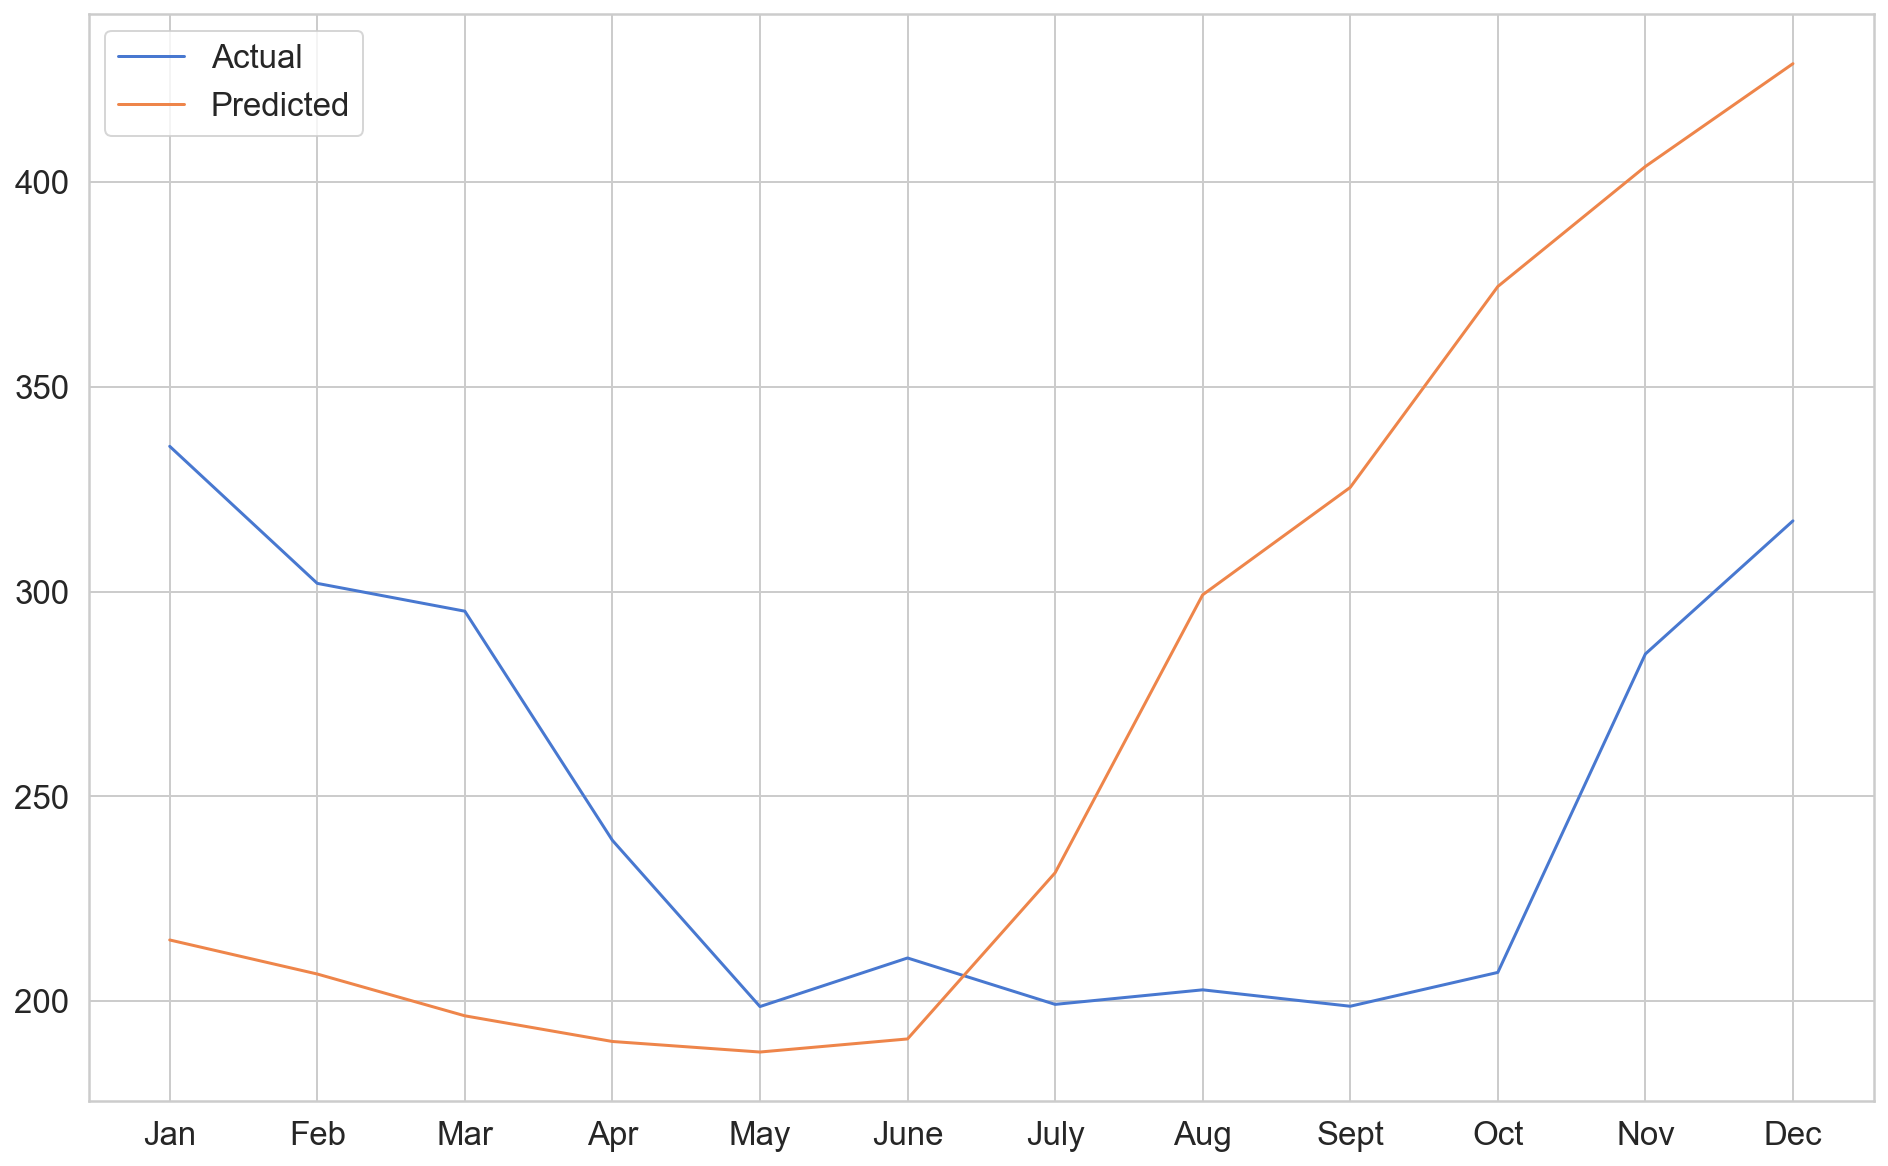

In [539]:
axis=["Jan","Feb","Mar","Apr","May","June","July","Aug","Sept","Oct","Nov","Dec"]
plt.plot(axis,df_google.iloc[:, 0], label='Actual')
plt.plot(axis,lst_output, label='Predicted')

plt.legend()

In [407]:
#accuracy measure
err=sqrt(mean_squared_error(lst_output,df_google))
t=train.iloc[1].mean()
print(t)
rmse=(err/t)*100
print(rmse)


248.81442285697514
42.54972752463872
